In [4]:
from scprint import scPrint
from scdataloader import Preprocessor
from scprint.tasks import GRNfer

from bengrn import BenGRN, get_sroy_gt
import scanpy as sc
from grnndata import GRNAnnData, read_h5ad, from_anndata


import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import train_test_split

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3, compute_scenic
from grnndata import utils as grnutils

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

In [5]:
#model = scPrint.load_from_checkpoint('../../data/tensorboard/scprint_test/urxxwu28/checkpoints/epoch=0-step=20000.ckpt') #chocolate-surf-8
model = scPrint.load_from_checkpoint('../../data/temp/vbd8bavn/epoch=17-step=90000.ckpt', precpt_gene_emb = None)#'../../data/main/gene_embeddings.parquet')
# ../../data/temp/epoch=4-step=12500.ckpt latest model maestro (fortuitous laugther)
# ../../data/logs/scprint_test/f4vao230/checkpoints/epoch=10-step=27500.ckpt looked good as a training run (vermlillion noodle)
# d1792z9k/epoch=3-step=10000.ckpt
# '../../data/temp/d1792z9k/epoch=3-step=10000.ckpt'
# '../../data/temp/6q3dzi3x/epoch=3-step=10000.ckpt'
# '../../data/temp/grsachbg/epoch=2-step=15000.ckpt'
# ../../data/temp/za9mg1w3/epoch=7-step=40000.ckpt
## post debug
# "../lightning_logs/version_14/checkpoints/epoch=1-step=5000.ckpt"

In [6]:
adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/yBCKp6HmXuHa0cZptMo7.h5ad') 

In [7]:
adata.var["isTF"]=False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"]=True

In [8]:
elem = [
 'kidney collecting duct principal cell', 
 'mesangial cell',
 'blood vessel smooth muscle cell',
 'podocyte',
 'macrophage',
 'leukocyte',
 'kidney interstitial fibroblast',
 'endothelial cell',
]
elem

['kidney collecting duct principal cell',
 'mesangial cell',
 'blood vessel smooth muscle cell',
 'podocyte',
 'macrophage',
 'leukocyte',
 'kidney interstitial fibroblast',
 'endothelial cell']

## in the cell bellow I have initially tested only two cell types with only the transcripts level data in omnipath

/tmp/ipykernel_339129/3355420762.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


kidney collecting duct principal cell
scprint



/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:6: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  ) < LooseVersion("1.15"):
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 536246649, sparsity: 1.0
base enrichment
too many genes for central computation
_________________________________________
TF specific enrichment


2024-05-03 15:35:41,100:INFO - Downloading and generating Enrichr library gene sets...
2024-05-03 15:35:41,102:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-05-03 15:35:41,325:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0


found some significant results for  3.5714285714285716 % TFs

_________________________________________
loading GT,  omnipath


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:172: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros(adj.shape, dtype=np.float)


intersection of 11721 genes
intersection pct: 0.5063285671087304
precision:  0.0005819036884212376 
recall:  1.0 
random precision: 0.0005819533389065977


 98%|█████████▊| 97/99 [00:23<00:00,  4.21it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:695: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:23<00:00,  4.19it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0006219258195974062
EPR: 2.670521124189685


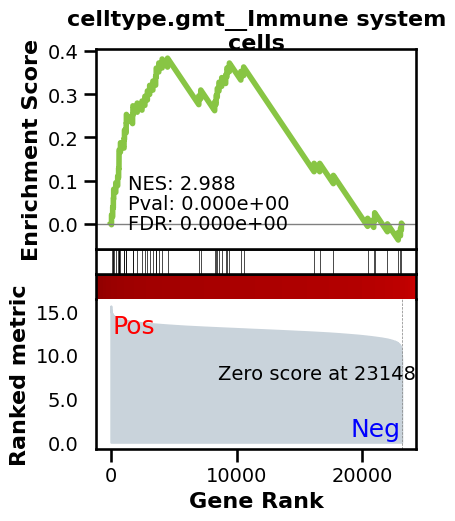

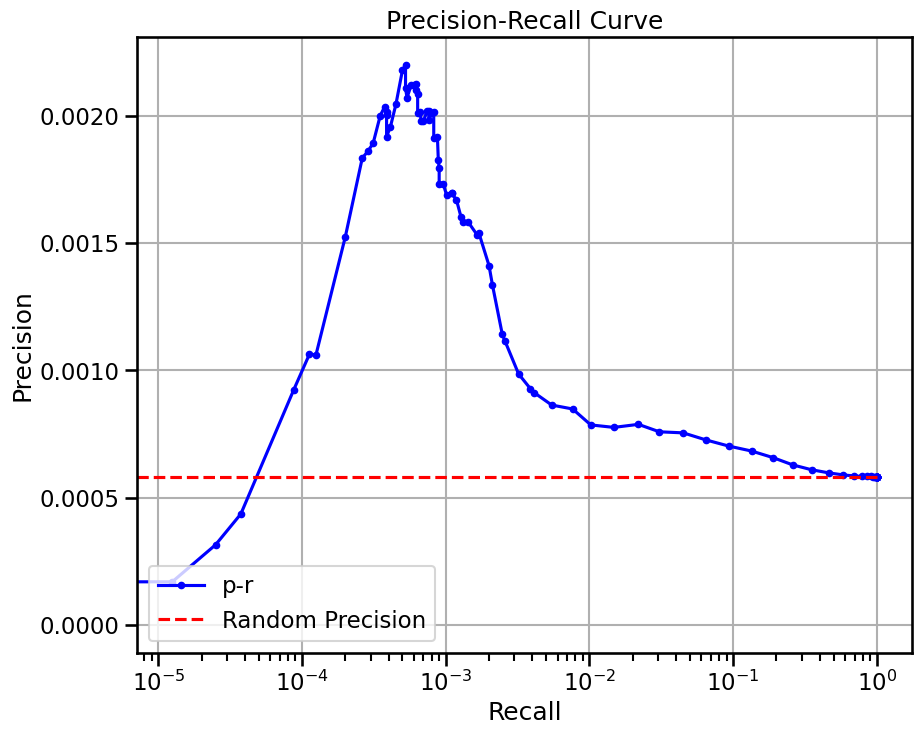

{'enriched_terms_Targets': ['celltype.gmt__Immune system cells', 'celltype.gmt__Effector CD4+ T cells', 'celltype.gmt__Naive CD4+ T cells', 'celltype.gmt__Memory CD4+ T cells', 'celltype.gmt__-T cells', 'celltype.gmt__Effector CD8+ T cells', 'celltype.gmt__Naive CD8+ T cells'], 'significant_enriched_TFtargets': 3.5714285714285716, 'precision': 0.0005819036884212376, 'recall': 1.0, 'rand_precision': 0.0005819533389065977, 'auprc': 0.0006219258195974062, 'EPR': 2.670521124189685}
______________________________
now with classifier


/tmp/ipykernel_339129/3355420762.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


scprint



/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:327: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(genes), len(genes)), dtype=np.float)


true elem 21657 ...
doing regression....
metrics {'used_heads': 13, 'precision': 0.022556390977443608, 'random_precision': 0.00121056993893909, 'recall': 0.00020745453288154345, 'predicted_true': 133.0, 'number_of_true': 14461.0, 'epr': 2.6380674349100404}


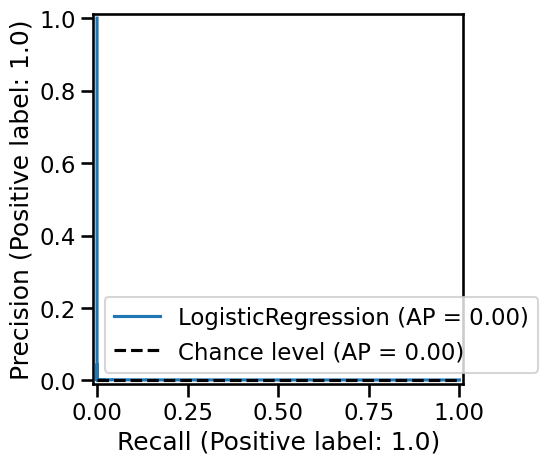

{'used_heads': 13, 'precision': 0.022556390977443608, 'random_precision': 0.00121056993893909, 'recall': 0.00020745453288154345, 'predicted_true': 133.0, 'number_of_true': 14461.0, 'epr': 2.6380674349100404}
base enrichment
Top central genes: []


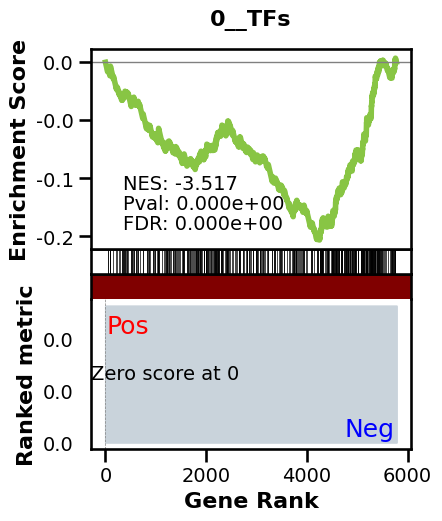

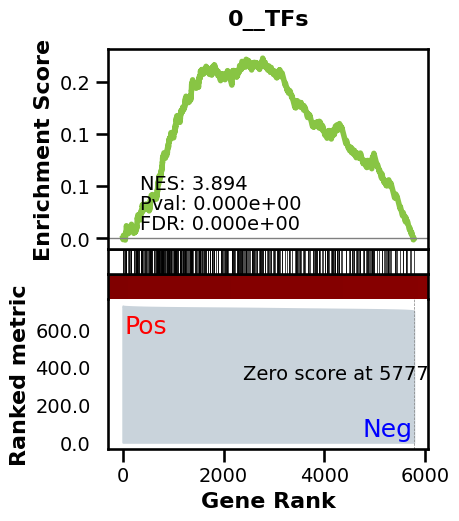

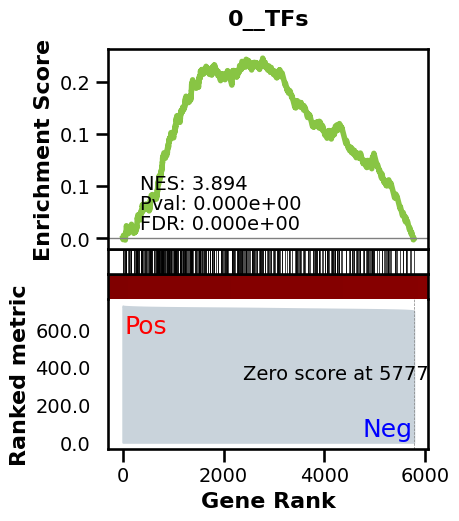

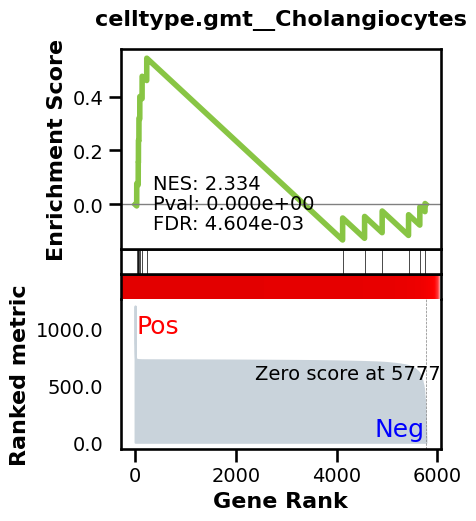

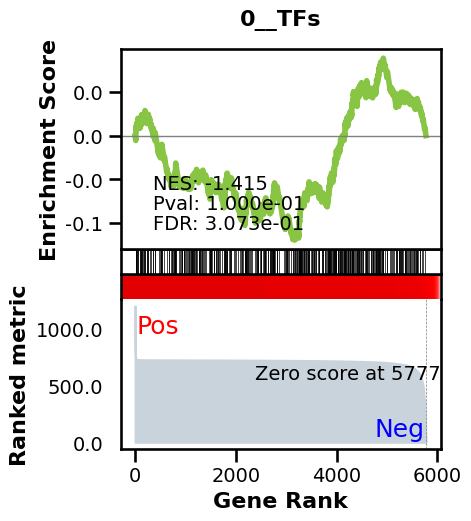

_________________________________________
TF specific enrichment


2024-05-03 15:42:27,538:INFO - Downloading and generating Enrichr library gene sets...
2024-05-03 15:42:27,542:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-05-03 15:42:27,754:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0


found some significant results for  16.216216216216218 % TFs

_________________________________________
loading GT,  omnipath


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:172: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros(adj.shape, dtype=np.float)


intersection of 3971 genes
intersection pct: 0.6872620283835237
precision:  0.0006949781534356266 
recall:  1.0 
random precision: 0.0006951532109050059


 97%|█████████▋| 96/99 [00:02<00:00, 31.40it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:695: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:03<00:00, 32.22it/s]


Area Under Precision-Recall Curve (AUPRC):  0.001433569216058109
EPR: 3.689140422845674


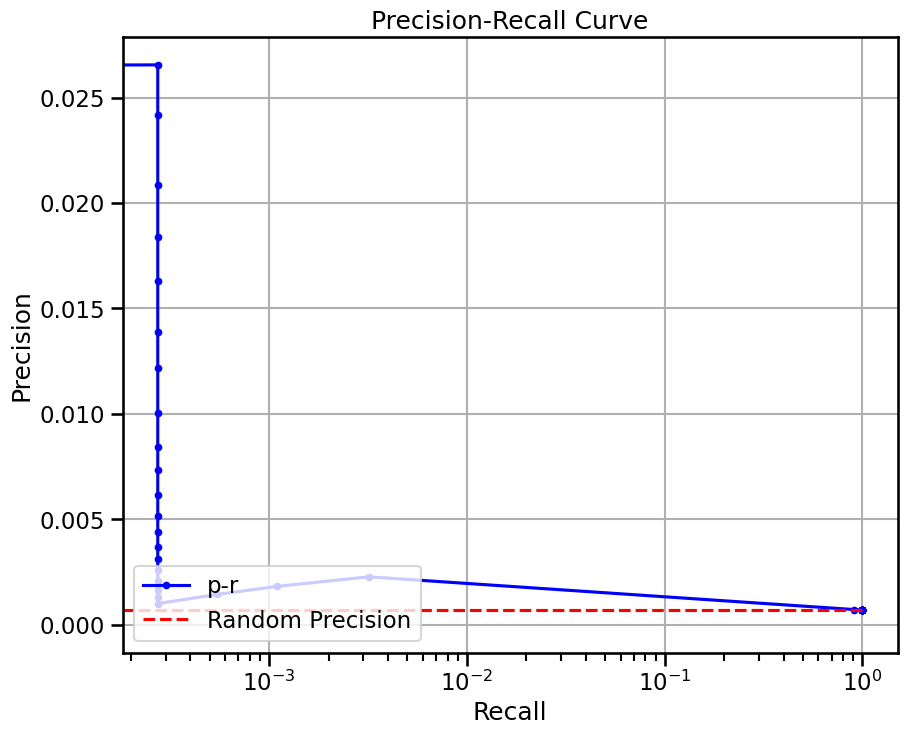

{'enriched_terms_Targets': ['0__TFs'], 'enriched_terms_Regulators': ['celltype.gmt__Cholangiocytes', 'celltype.gmt__Microfold cells', 'celltype.gmt__Mesenchymal cells', 'celltype.gmt__Acinar cells', 'celltype.gmt__Merkel cells'], 'significant_enriched_TFtargets': 16.216216216216218, 'precision': 0.0006949781534356266, 'recall': 1.0, 'rand_precision': 0.0006951532109050059, 'auprc': 0.001433569216058109, 'EPR': 3.689140422845674}
__________________________________


/tmp/ipykernel_339129/3355420762.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


mesangial cell
scprint



/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 169104016, sparsity: 1.0
base enrichment
too many genes for central computation


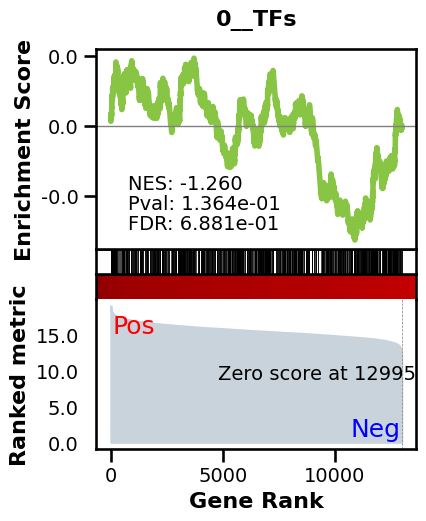

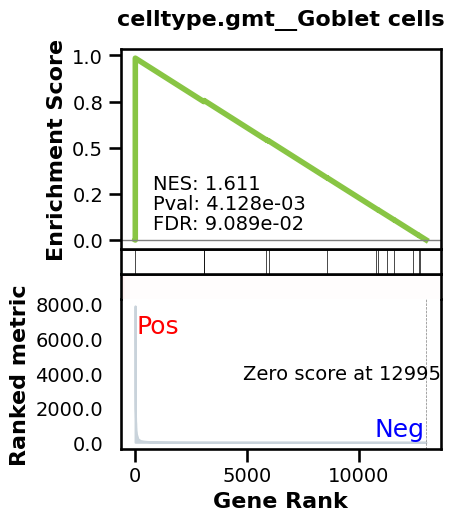

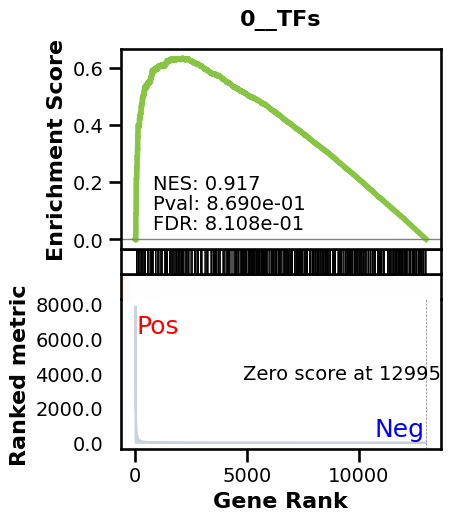

_________________________________________
TF specific enrichment


2024-05-03 15:44:05,213:INFO - Downloading and generating Enrichr library gene sets...
2024-05-03 15:44:05,216:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-05-03 15:44:05,438:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:172: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros(adj.shape, dtype=np.float)


intersection of 6985 genes
intersection pct: 0.5374730686365036
precision:  0.0006492079099860679 
recall:  1.0 
random precision: 0.0006493008664451152


 97%|█████████▋| 96/99 [00:08<00:00, 11.89it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:695: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:08<00:00, 11.90it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0006674068098735499
EPR: 1.5082923126133307


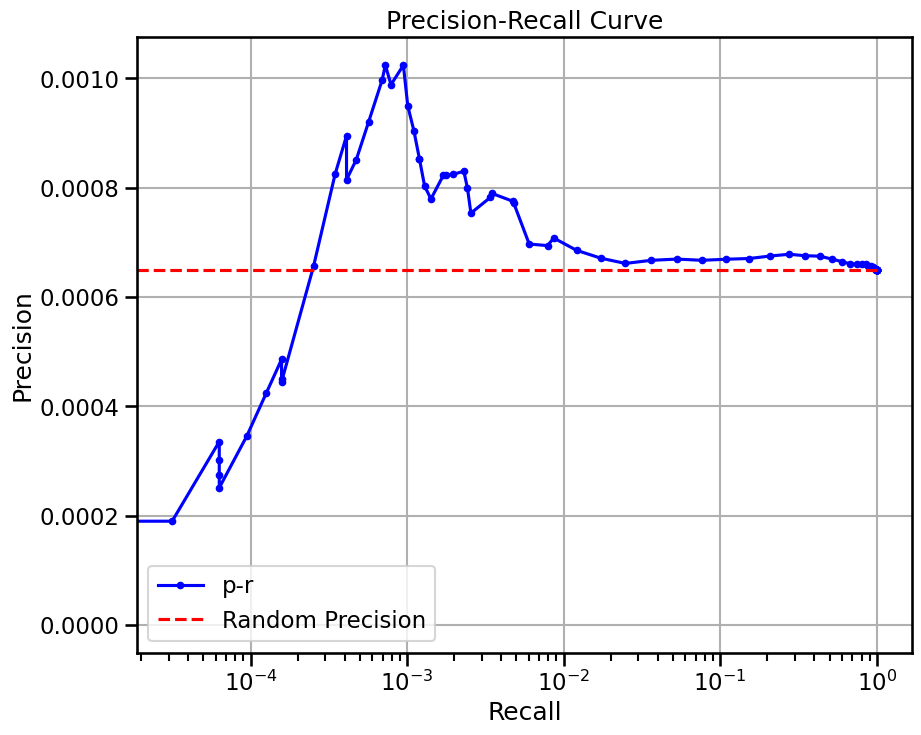

{'enriched_terms_Regulators': ['celltype.gmt__Goblet cells', 'celltype.gmt__Cone bipolar cells', 'celltype.gmt__Alveolar macrophages'], 'significant_enriched_TFtargets': 0.0, 'precision': 0.0006492079099860679, 'recall': 1.0, 'rand_precision': 0.0006493008664451152, 'auprc': 0.0006674068098735499, 'EPR': 1.5082923126133307}
______________________________
now with classifier


/tmp/ipykernel_339129/3355420762.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


scprint



/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs['organism_ontology_term_id'][0]],
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:327: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(genes), len(genes)), dtype=np.float)


true elem 8758 ...
doing regression....
metrics {'used_heads': 7, 'precision': 0.005025125628140704, 'random_precision': 0.0013416017527068612, 'recall': 0.00014880952380952382, 'predicted_true': 199.0, 'number_of_true': 6720.0, 'epr': 2.225670750723992}


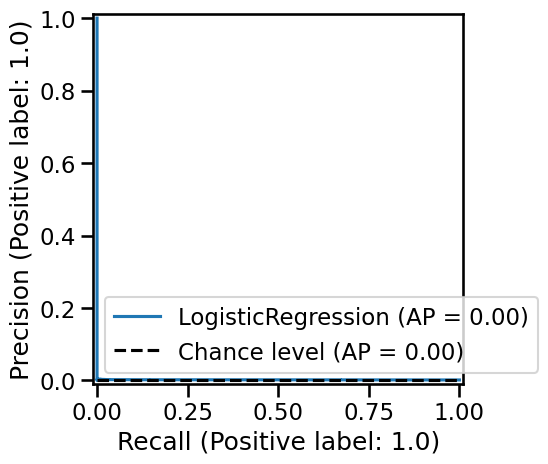

{'used_heads': 7, 'precision': 0.005025125628140704, 'random_precision': 0.0013416017527068612, 'recall': 0.00014880952380952382, 'predicted_true': 199.0, 'number_of_true': 6720.0, 'epr': 2.225670750723992}
base enrichment
Top central genes: []


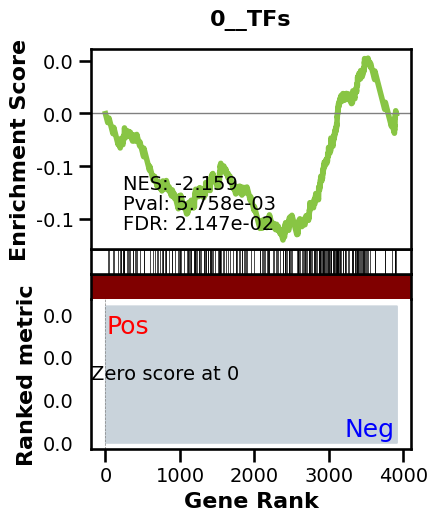

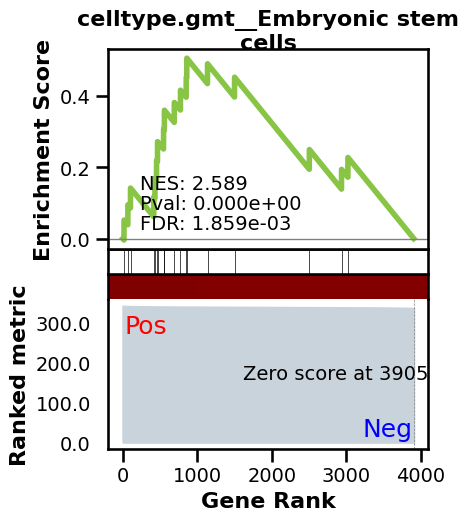

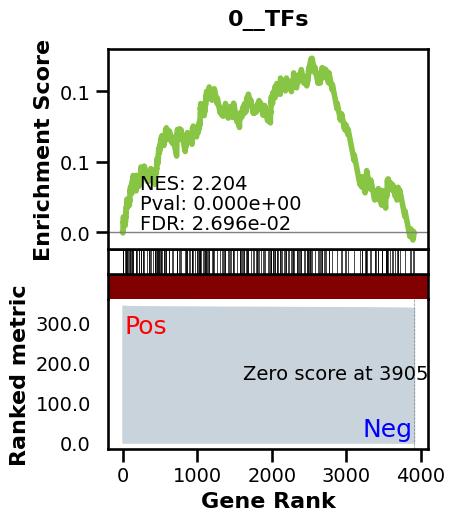

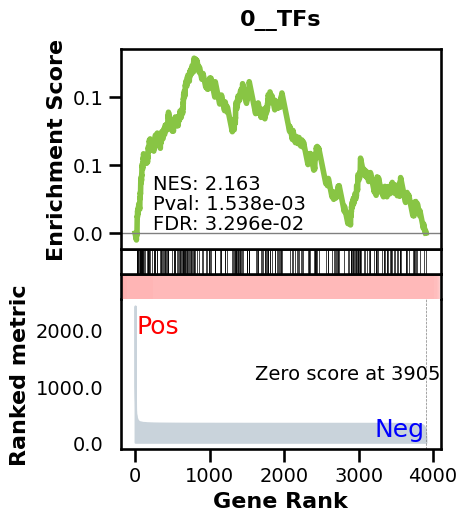

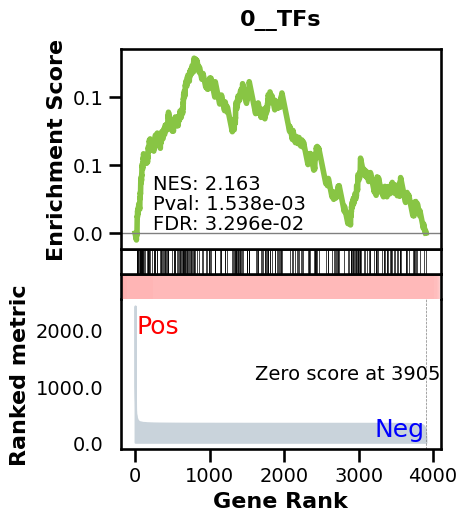

_________________________________________
TF specific enrichment


2024-05-03 15:46:47,650:INFO - Downloading and generating Enrichr library gene sets...
2024-05-03 15:46:47,652:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-05-03 15:46:47,828:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0


found some significant results for  33.333333333333336 % TFs

_________________________________________
loading GT,  omnipath


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:172: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros(adj.shape, dtype=np.float)


intersection of 2568 genes
intersection pct: 0.6574500768049155
precision:  0.000727410690890034 
recall:  1.0 
random precision: 0.0007276940608514248


 97%|█████████▋| 96/99 [00:01<00:00, 80.70it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:695: RuntimeWarning: invalid value encountered in long_scalars
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 99/99 [00:01<00:00, 79.44it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0011982099378596265
EPR: 2.0082410292842168


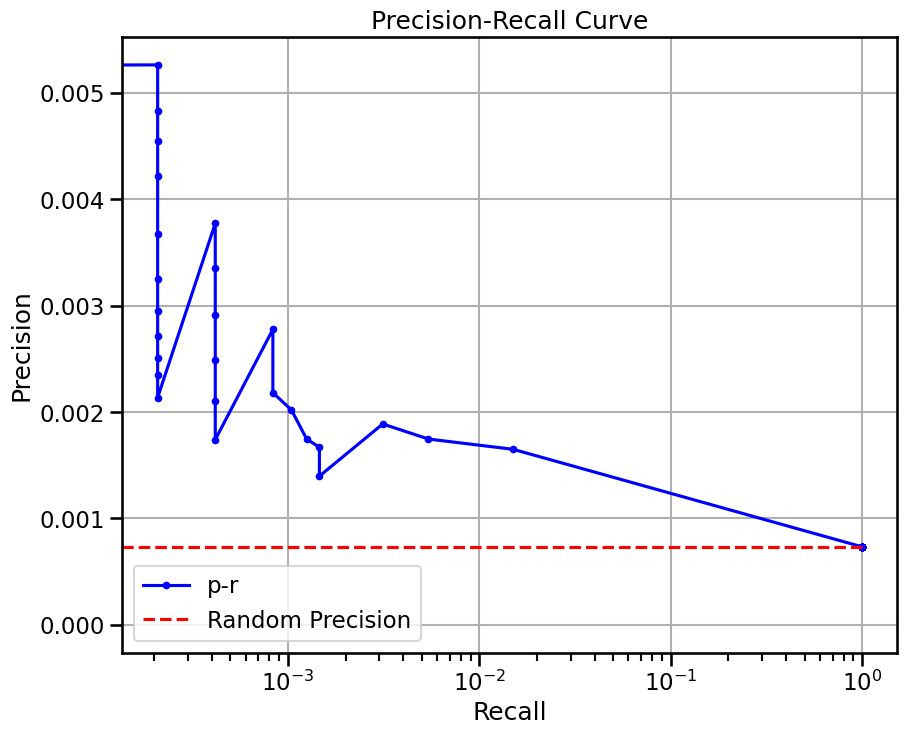

{'enriched_terms_Targets': ['celltype.gmt__Embryonic stem cells', '0__TFs', 'celltype.gmt__Mesangial cells', 'celltype.gmt__Mesenchymal cells', 'celltype.gmt__Endothelial'], 'enriched_terms_Regulators': ['0__TFs'], 'significant_enriched_TFtargets': 33.333333333333336, 'precision': 0.000727410690890034, 'recall': 1.0, 'rand_precision': 0.0007276940608514248, 'auprc': 0.0011982099378596265, 'EPR': 2.0082410292842168}
__________________________________


: 

In [9]:
metrics = {}
for celltype in elem[:2]:
    grn_inferer = GRNfer(model, adata,
        how="random expr",
        preprocess="softmax",
        head_agg='max',
        filtration="none",
        forward_mode="none",
        organisms=adata.obs['organism_ontology_term_id'][0],
        apc=False,
        symmetrize=False,
        num_genes=3000,
        max_cells=1024,
        doplot=False,
        batch_size=32,
    )
    print(celltype)
    print("scprint\n")
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    m = BenGRN(grn).scprint_benchmark()
    metrics[celltype+'_scprint'] = m
    print(m)
    print("______________________________")
    print("now with classifier")
    grn_inferer = GRNfer(model, adata,
        how="most var across",
        preprocess="softmax",
        head_agg='none',
        filtration="none",
        forward_mode="none",
        organisms=adata.obs['organism_ontology_term_id'][0],
        apc=False,
        symmetrize=False,
        num_genes=6000,
        max_cells=1024,
        doplot=False,
        batch_size=32,
    )
    print("scprint\n")
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn, m = train_classifier(grn, C=0.1, train_size=0.3, class_weight={1: 100, 0: 1}, shuffle=False)
    grn.varp['GRN'] = grn.varp['classified']
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    print(m)
    m = BenGRN(grn).scprint_benchmark()
    print(m)
    metrics[celltype+'_scprint_class'] = m
    print("__________________________________")

[autoreload of scprint.model.model failed: Traceback (most recent call last):
  File "/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/ml4ig1/Documents code/scPRINT/scprint/model/model.py", line 1030
    def 

kidney collecting duct principal cell
scprint



/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.col = Collator(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 536246649, sparsity: 1.0
base enrichment
too many genes for central computation
_________________________________________
TF specific enrichment


2024-05-03 11:39:38,800:INFO - Downloading and generating Enrichr library gene sets...
2024-05-03 11:39:38,802:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-05-03 11:39:39,022:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0


found some significant results for  4.464285714285714 % TFs

_________________________________________
loading GT,  omnipath


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:171: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros(adj.shape, dtype=np.float)


intersection of 12455 genes
intersection pct: 0.5380362002678302
precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398


 98%|█████████▊| 97/99 [00:24<00:00,  3.90it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:695: RuntimeWarning: invalid value encountered in long_scalars
  recall = (grn[true] > threshold).sum() / true.sum()
100%|██████████| 99/99 [00:25<00:00,  3.89it/s]


Area Under Precision-Recall Curve (AUPRC):  0.000983787401686003
EPR: 2.35120772264366


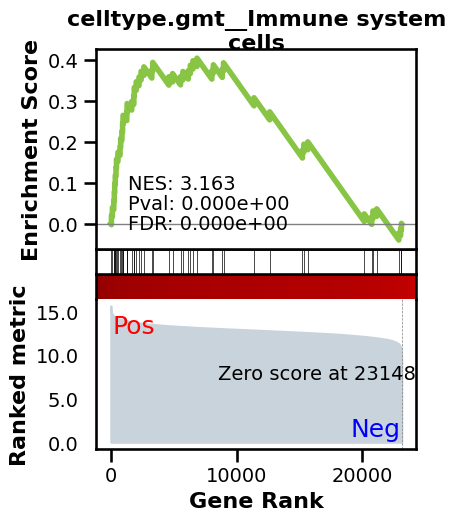

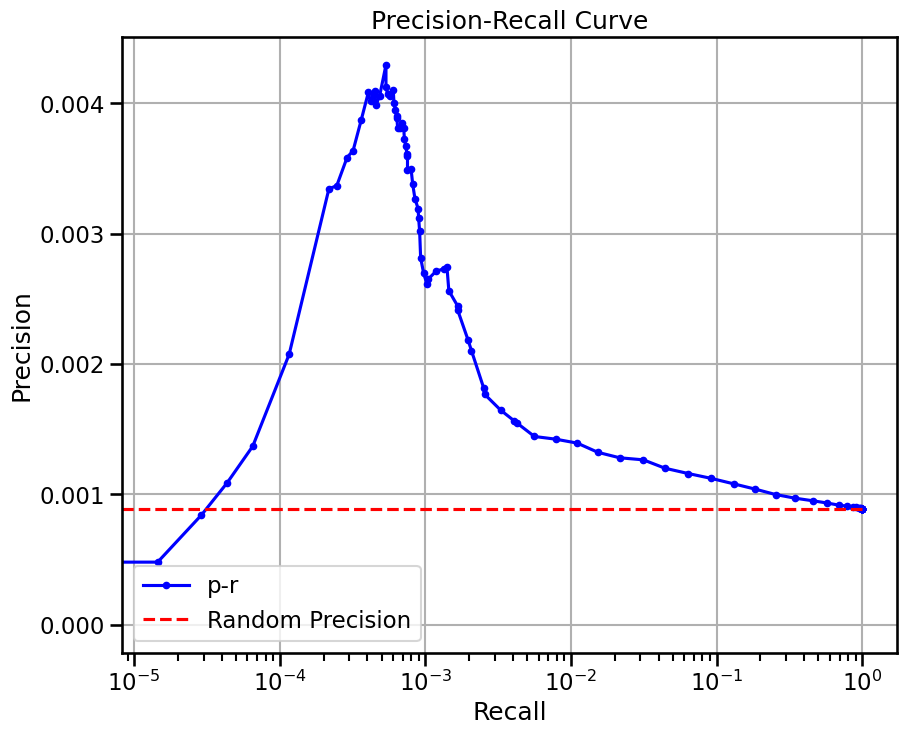

{'enriched_terms_Targets': ['celltype.gmt__Immune system cells', 'celltype.gmt__Effector CD4+ T cells', 'celltype.gmt__Effector CD8+ T cells', 'celltype.gmt__Naive CD4+ T cells', 'celltype.gmt__Memory CD4+ T cells', 'celltype.gmt__-T cells', 'celltype.gmt__Naive CD8+ T cells', 'celltype.gmt__Memory CD8+ T cells', 'celltype.gmt__CD4+ NKT-like cells'], 'significant_enriched_TFtargets': 4.464285714285714, 'precision': 0.0008896322223674437, 'recall': 1.0, 'rand_precision': 0.0008897036558203398, 'auprc': 0.000983787401686003, 'EPR': 2.35120772264366}
______________________________
now with classifier


/tmp/ipykernel_297311/4148537333.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


scprint



/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.col = Collator(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:326: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(genes), len(genes)), dtype=np.float)


true elem 21657 ...
doing regression....
metrics {'used_heads': 13, 'precision': 0.022556390977443608, 'random_precision': 0.00121056993893909, 'recall': 0.00020745453288154345, 'predicted_true': 133.0, 'number_of_true': 14461.0, 'epr': 2.6380674349100404}


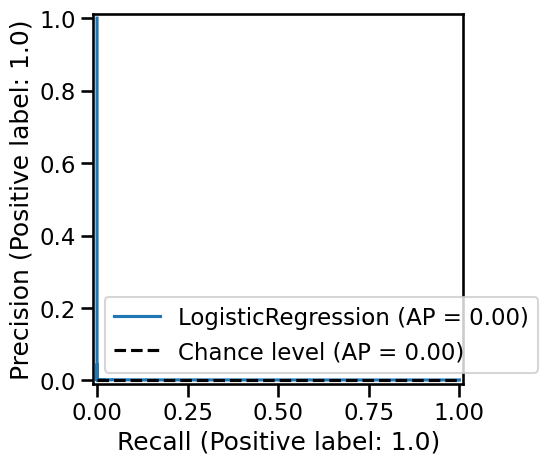

{'used_heads': 13, 'precision': 0.022556390977443608, 'random_precision': 0.00121056993893909, 'recall': 0.00020745453288154345, 'predicted_true': 133.0, 'number_of_true': 14461.0, 'epr': 2.6380674349100404}
base enrichment
Top central genes: []


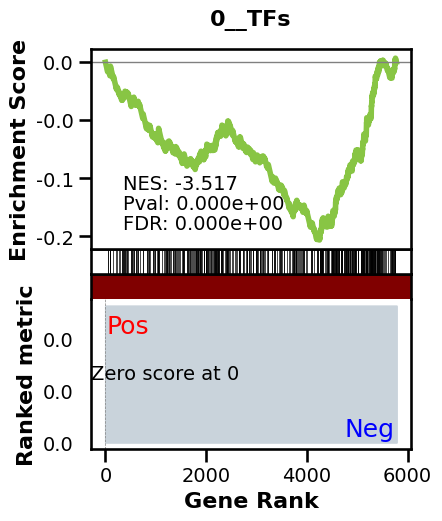

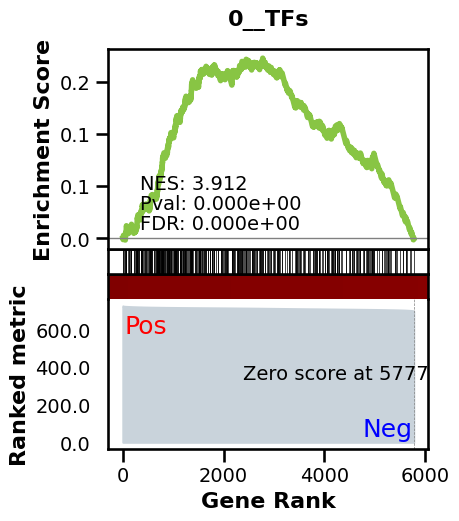

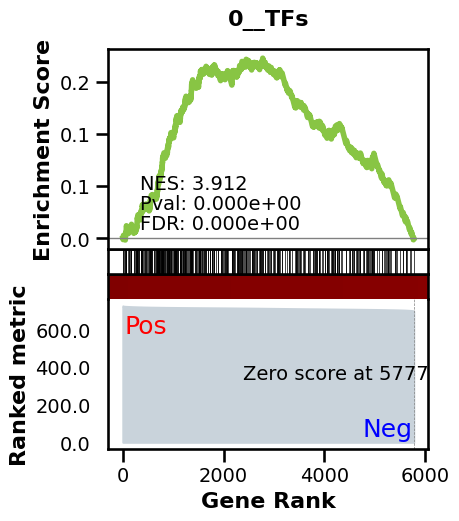

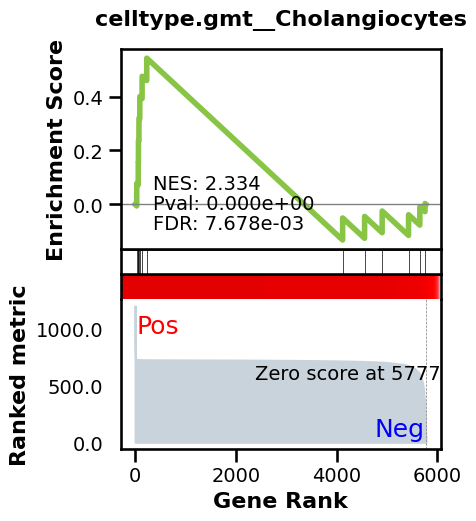

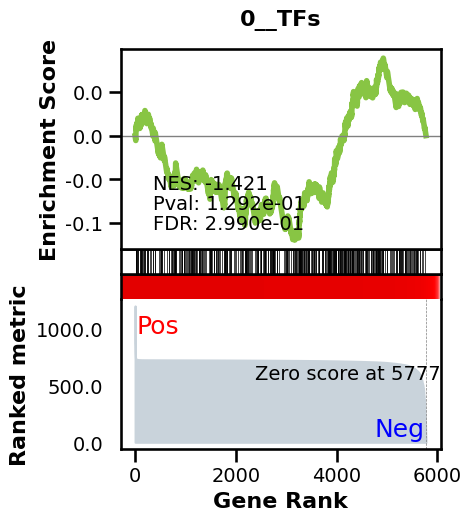

_________________________________________
TF specific enrichment


2024-05-03 11:47:22,894:INFO - Downloading and generating Enrichr library gene sets...
2024-05-03 11:47:22,898:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-05-03 11:47:23,130:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0


found some significant results for  16.216216216216218 % TFs

_________________________________________
loading GT,  omnipath


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:171: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros(adj.shape, dtype=np.float)


intersection of 4131 genes
intersection pct: 0.7149532710280374
precision:  0.001269076805076729 
recall:  1.0 
random precision: 0.0012693840875961182


 96%|█████████▌| 95/99 [00:03<00:00, 31.21it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:695: RuntimeWarning: invalid value encountered in long_scalars
  recall = (grn[true] > threshold).sum() / true.sum()
100%|██████████| 99/99 [00:03<00:00, 30.55it/s]


Area Under Precision-Recall Curve (AUPRC):  0.002498071476980219
EPR: 2.740192495847055


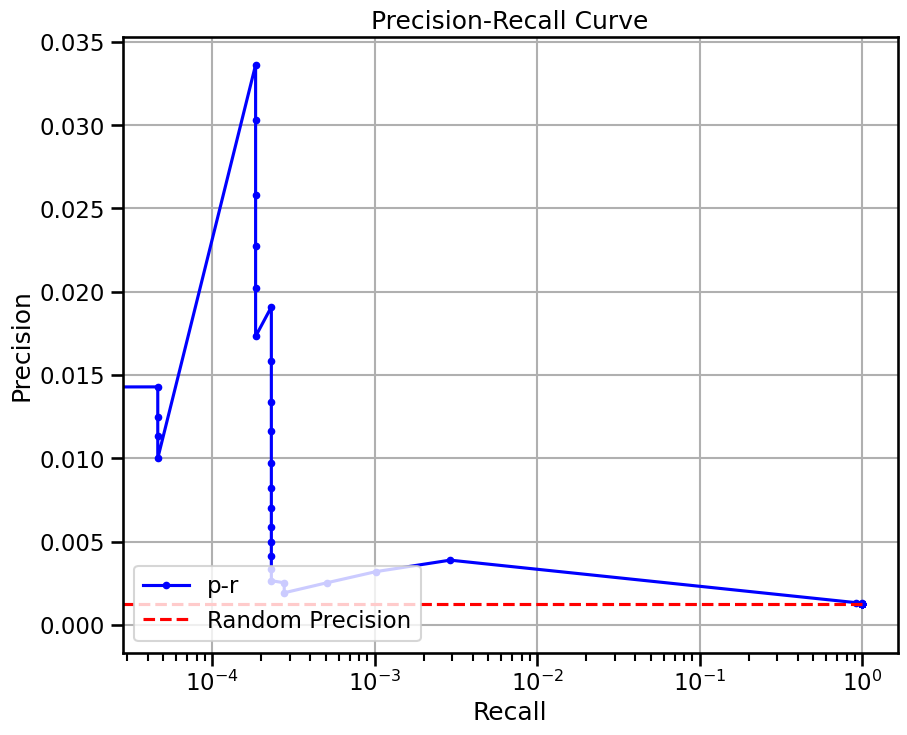

{'enriched_terms_Targets': ['0__TFs'], 'enriched_terms_Regulators': ['celltype.gmt__Cholangiocytes', 'celltype.gmt__Microfold cells', 'celltype.gmt__Mesenchymal cells', 'celltype.gmt__Acinar cells', 'celltype.gmt__Merkel cells', 'celltype.gmt__Embryonic stem cells'], 'significant_enriched_TFtargets': 16.216216216216218, 'precision': 0.001269076805076729, 'recall': 1.0, 'rand_precision': 0.0012693840875961182, 'auprc': 0.002498071476980219, 'EPR': 2.740192495847055}
__________________________________


/tmp/ipykernel_297311/4148537333.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


mesangial cell
scprint



/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.col = Collator(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 169520400, sparsity: 1.0
base enrichment
too many genes for central computation


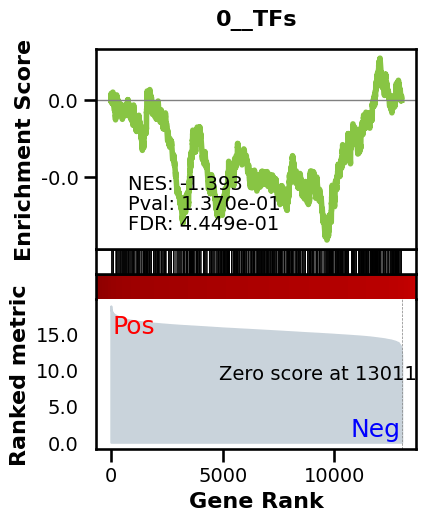

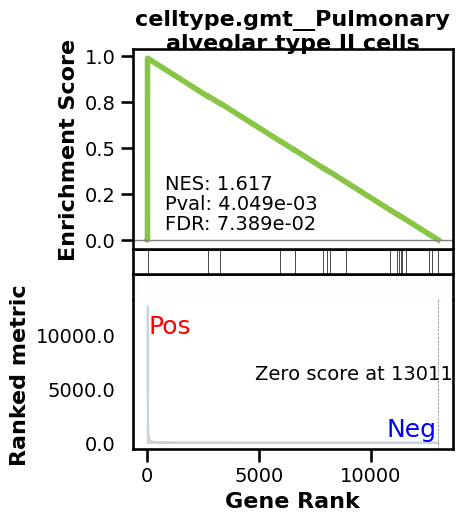

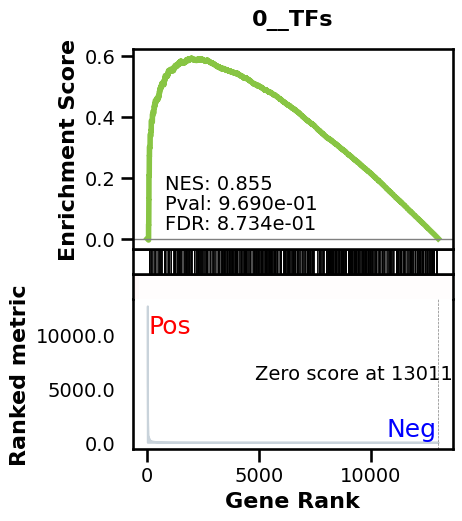

_________________________________________
TF specific enrichment


2024-05-03 11:49:11,051:INFO - Downloading and generating Enrichr library gene sets...
2024-05-03 11:49:11,054:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-05-03 11:49:11,263:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0


found some significant results for  2.857142857142857 % TFs

_________________________________________
loading GT,  omnipath


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:171: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros(adj.shape, dtype=np.float)


intersection of 7418 genes
intersection pct: 0.5700891484783277
precision:  0.000842136268188526 
recall:  1.0 
random precision: 0.0008422498095486701


 97%|█████████▋| 96/99 [00:08<00:00, 11.21it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:695: RuntimeWarning: invalid value encountered in long_scalars
  recall = (grn[true] > threshold).sum() / true.sum()
100%|██████████| 99/99 [00:08<00:00, 11.22it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0009425037094756353
EPR: 0.9222500528641819


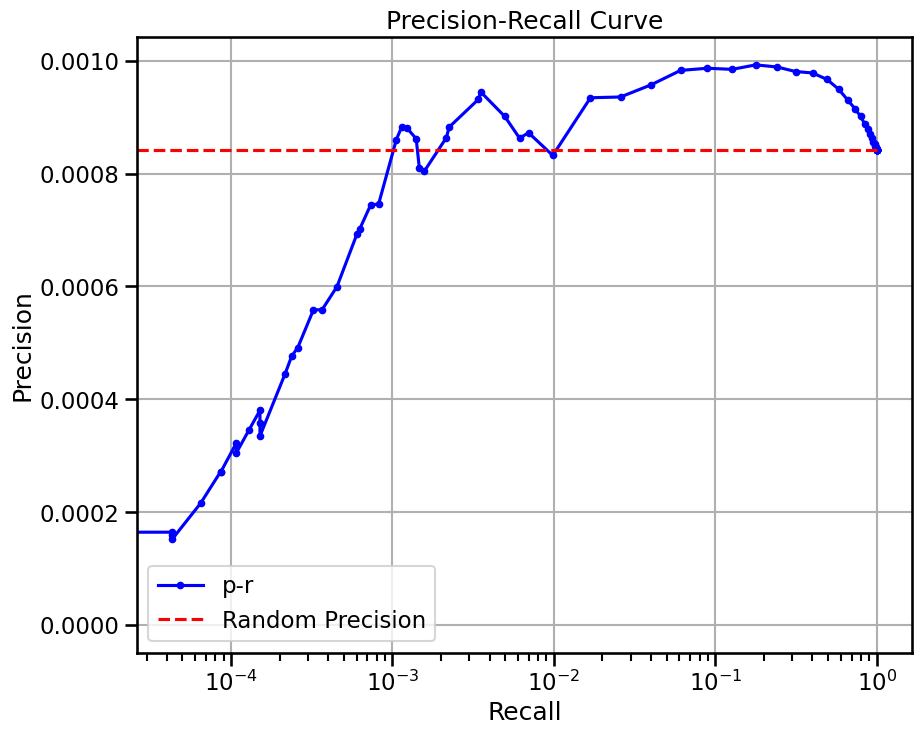

{'enriched_terms_Regulators': ['celltype.gmt__Pulmonary alveolar type II cells'], 'significant_enriched_TFtargets': 2.857142857142857, 'precision': 0.000842136268188526, 'recall': 1.0, 'rand_precision': 0.0008422498095486701, 'auprc': 0.0009425037094756353, 'EPR': 0.9222500528641819}
______________________________
now with classifier


/tmp/ipykernel_297311/4148537333.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


scprint



/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.col = Collator(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:326: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(genes), len(genes)), dtype=np.float)


true elem 8758 ...
doing regression....
metrics {'used_heads': 7, 'precision': 0.005025125628140704, 'random_precision': 0.0013416017527068612, 'recall': 0.00014880952380952382, 'predicted_true': 199.0, 'number_of_true': 6720.0, 'epr': 2.225670750723992}


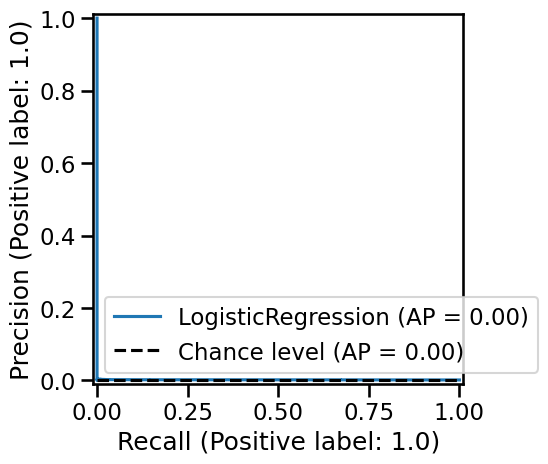

{'used_heads': 7, 'precision': 0.005025125628140704, 'random_precision': 0.0013416017527068612, 'recall': 0.00014880952380952382, 'predicted_true': 199.0, 'number_of_true': 6720.0, 'epr': 2.225670750723992}
base enrichment
Top central genes: []


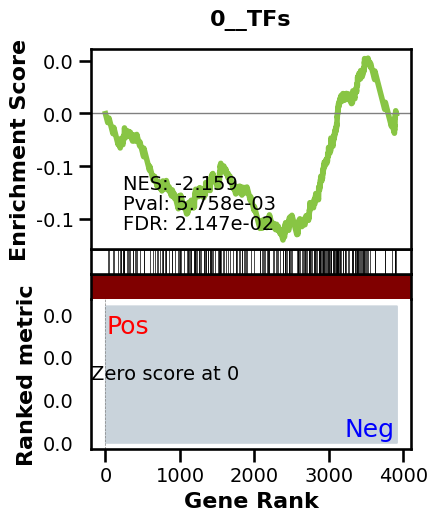

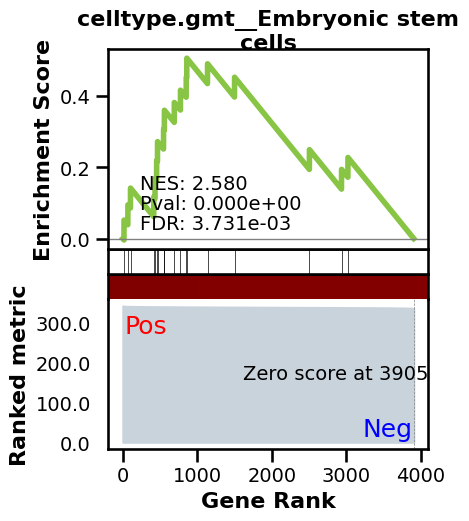

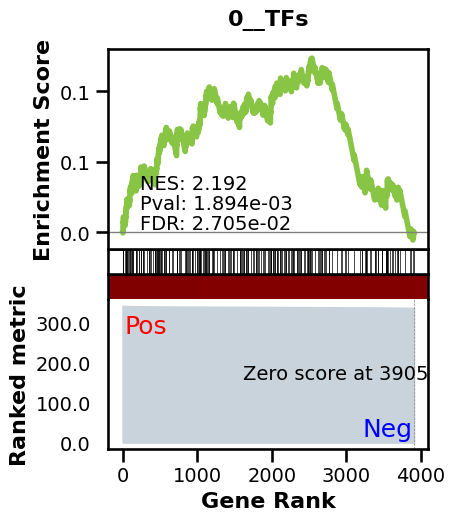

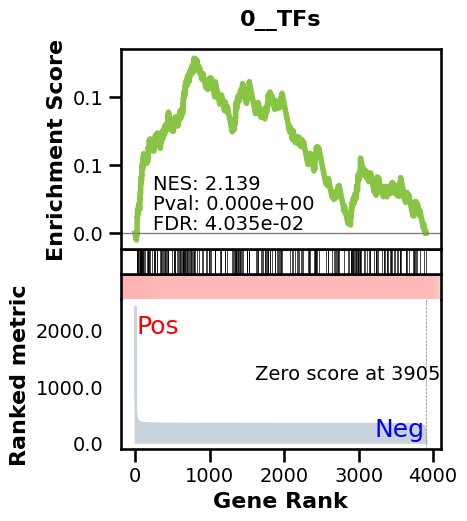

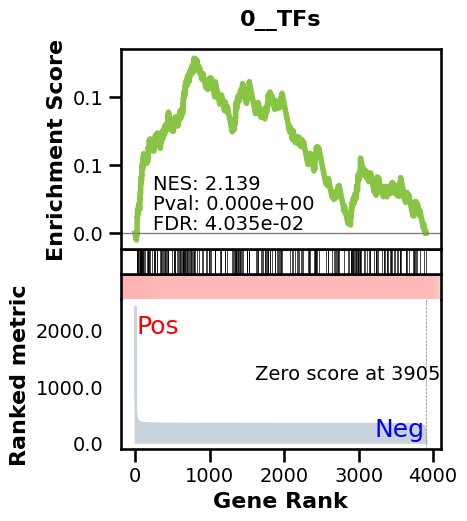

_________________________________________
TF specific enrichment


2024-05-03 11:52:00,611:INFO - Downloading and generating Enrichr library gene sets...
2024-05-03 11:52:00,613:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-05-03 11:52:00,804:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0


found some significant results for  33.333333333333336 % TFs

_________________________________________
loading GT,  omnipath


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:171: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros(adj.shape, dtype=np.float)


intersection of 2675 genes
intersection pct: 0.6848438300051203
precision:  0.001223932221154686 
recall:  1.0 
random precision: 0.0012243899370189921


 97%|█████████▋| 96/99 [00:01<00:00, 79.34it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:695: RuntimeWarning: invalid value encountered in long_scalars
  recall = (grn[true] > threshold).sum() / true.sum()
100%|██████████| 99/99 [00:01<00:00, 77.35it/s]


Area Under Precision-Recall Curve (AUPRC):  0.001928883665913704
EPR: 2.4331443216005746


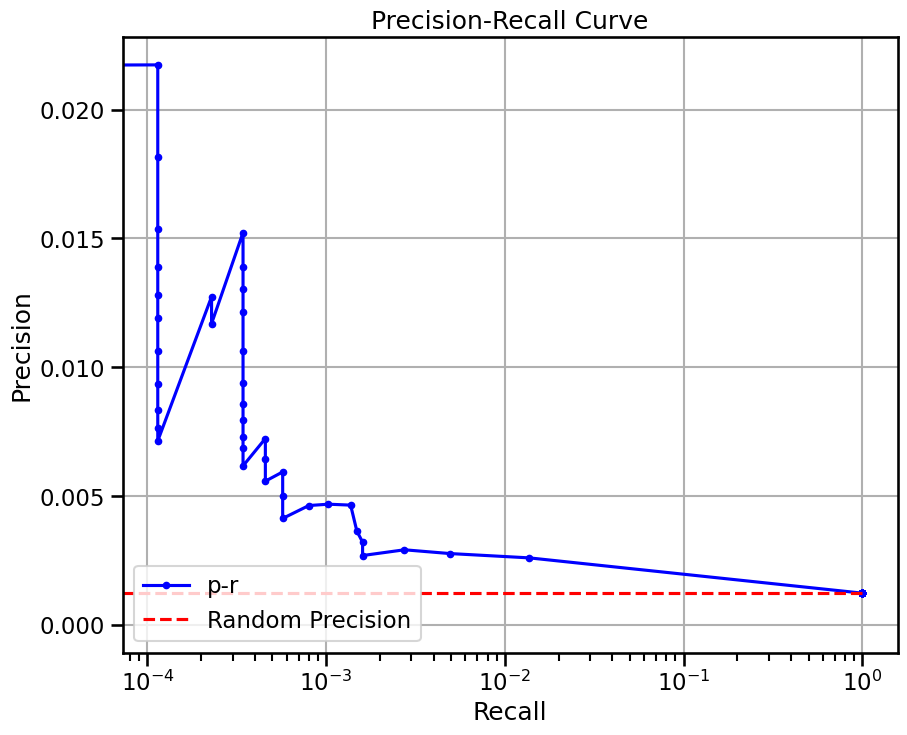

{'enriched_terms_Targets': ['celltype.gmt__Embryonic stem cells', '0__TFs', 'celltype.gmt__Mesangial cells', 'celltype.gmt__Mesenchymal cells', 'celltype.gmt__Endothelial', 'celltype.gmt__Endothelial cells', 'celltype.gmt__Myoblasts', 'celltype.gmt__Basal cells (Airway progenitor cells)'], 'enriched_terms_Regulators': ['0__TFs'], 'significant_enriched_TFtargets': 33.333333333333336, 'precision': 0.001223932221154686, 'recall': 1.0, 'rand_precision': 0.0012243899370189921, 'auprc': 0.001928883665913704, 'EPR': 2.4331443216005746}
__________________________________


/tmp/ipykernel_297311/4148537333.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


blood vessel smooth muscle cell
scprint



/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.col = Collator(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 536246649, sparsity: 1.0
base enrichment
too many genes for central computation
_________________________________________
TF specific enrichment


2024-05-03 11:53:47,671:INFO - Downloading and generating Enrichr library gene sets...
2024-05-03 11:53:47,673:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-05-03 11:53:47,865:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0


found some significant results for  2.6785714285714284 % TFs

_________________________________________
loading GT,  omnipath


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:171: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros(adj.shape, dtype=np.float)


intersection of 12455 genes
intersection pct: 0.5380362002678302
precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398


 98%|█████████▊| 97/99 [00:24<00:00,  4.01it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:695: RuntimeWarning: invalid value encountered in long_scalars
  recall = (grn[true] > threshold).sum() / true.sum()
100%|██████████| 99/99 [00:24<00:00,  4.01it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0010393440253405341
EPR: 2.4824074062508936


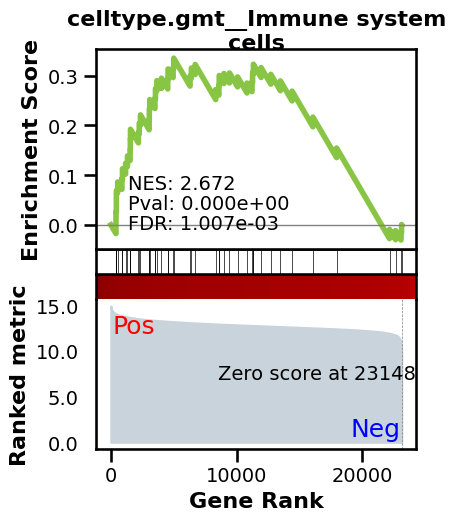

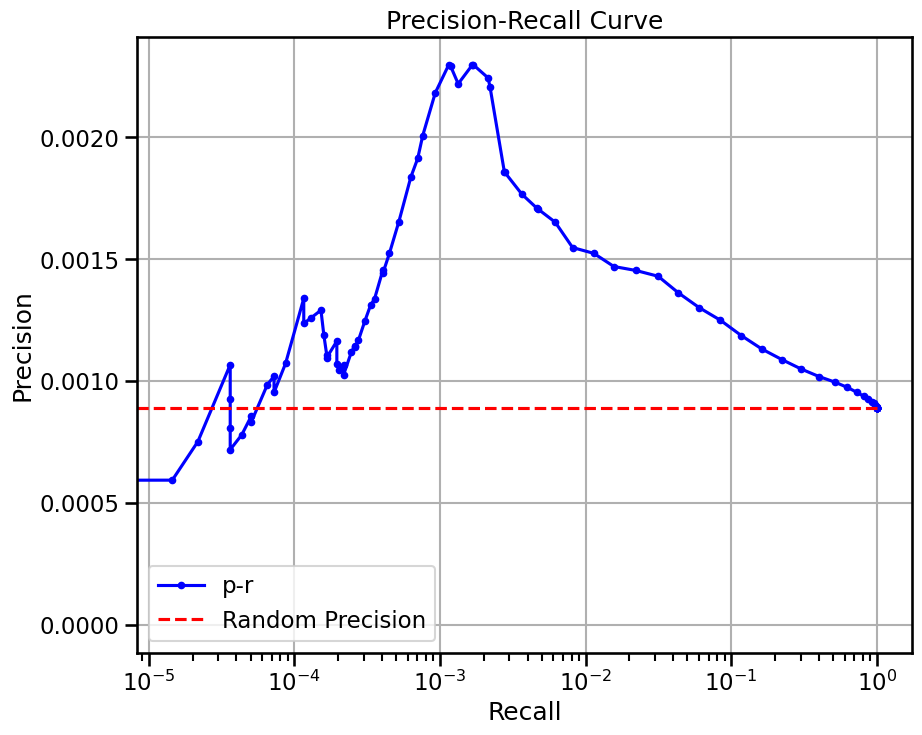

{'enriched_terms_Targets': ['celltype.gmt__Immune system cells', 'celltype.gmt__Effector CD4+ T cells', 'celltype.gmt__Naive CD4+ T cells', 'celltype.gmt__Memory CD4+ T cells', 'celltype.gmt__Effector CD8+ T cells', 'celltype.gmt__-T cells', 'celltype.gmt__Memory CD8+ T cells', 'celltype.gmt__Naive CD8+ T cells', 'celltype.gmt__Kupffer cells'], 'significant_enriched_TFtargets': 2.6785714285714284, 'precision': 0.0008896322223674437, 'recall': 1.0, 'rand_precision': 0.0008897036558203398, 'auprc': 0.0010393440253405341, 'EPR': 2.4824074062508936}
______________________________
now with classifier


/tmp/ipykernel_297311/4148537333.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


scprint



/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.col = Collator(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:326: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(genes), len(genes)), dtype=np.float)


true elem 22876 ...
doing regression....
metrics {'used_heads': 10, 'precision': 0.011603375527426161, 'random_precision': 0.0016559257525531122, 'recall': 0.0007088085572524003, 'predicted_true': 948.0, 'number_of_true': 15519.0, 'epr': 3.610865508190392}


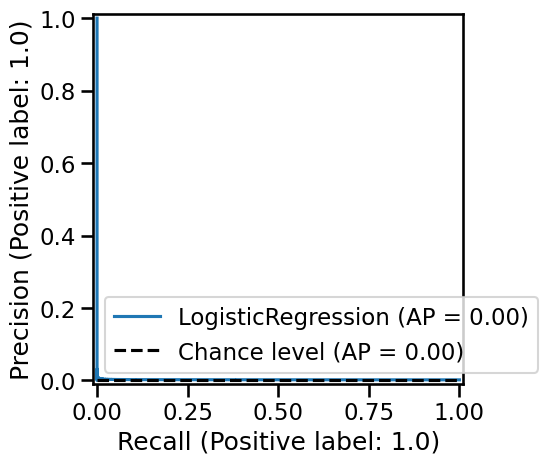

{'used_heads': 10, 'precision': 0.011603375527426161, 'random_precision': 0.0016559257525531122, 'recall': 0.0007088085572524003, 'predicted_true': 948.0, 'number_of_true': 15519.0, 'epr': 3.610865508190392}
base enrichment
Top central genes: []


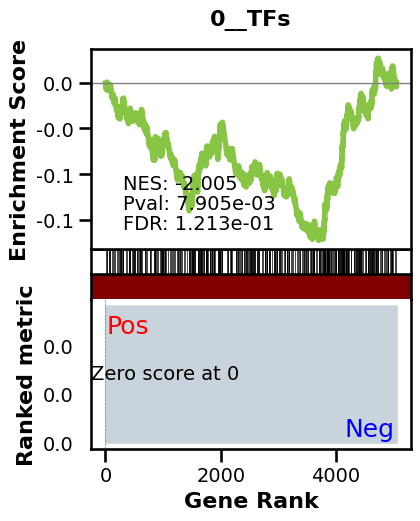

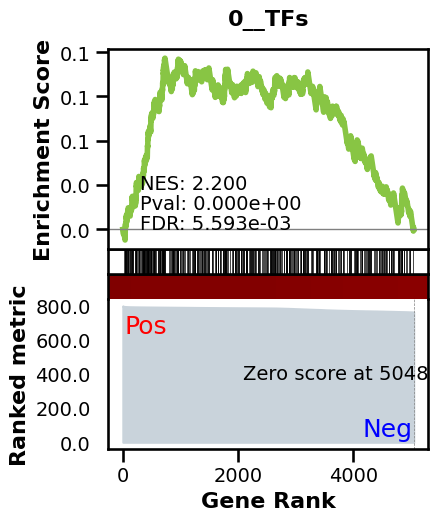

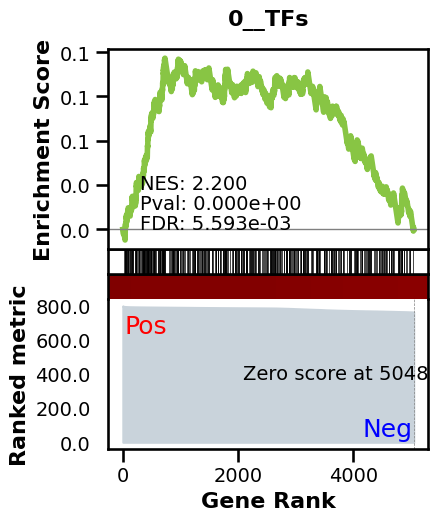

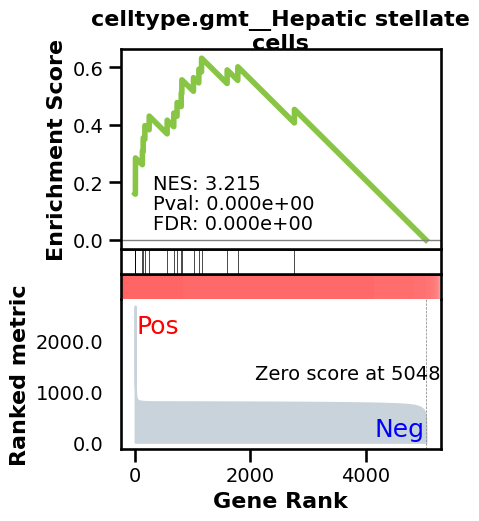

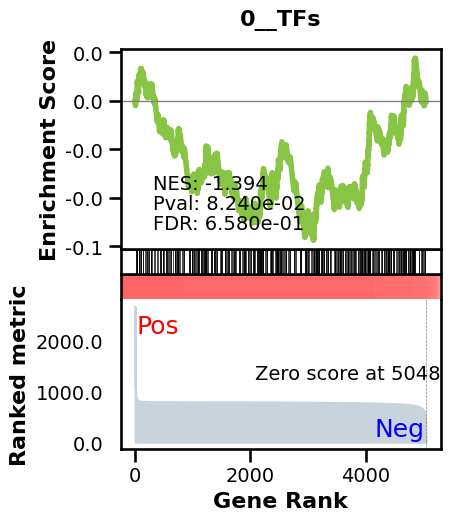

_________________________________________
TF specific enrichment


2024-05-03 11:59:36,553:INFO - Downloading and generating Enrichr library gene sets...
2024-05-03 11:59:36,556:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-05-03 11:59:36,765:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0


found some significant results for  24.59016393442623 % TFs

_________________________________________
loading GT,  omnipath


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:171: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros(adj.shape, dtype=np.float)


intersection of 3659 genes
intersection pct: 0.7246979599920776
precision:  0.0017086584902124477 
recall:  1.0 
random precision: 0.001709125592041374


 97%|█████████▋| 96/99 [00:02<00:00, 38.94it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:695: RuntimeWarning: invalid value encountered in long_scalars
  recall = (grn[true] > threshold).sum() / true.sum()
100%|██████████| 99/99 [00:02<00:00, 37.90it/s]


Area Under Precision-Recall Curve (AUPRC):  0.002759458270520778
EPR: 3.508176665746162


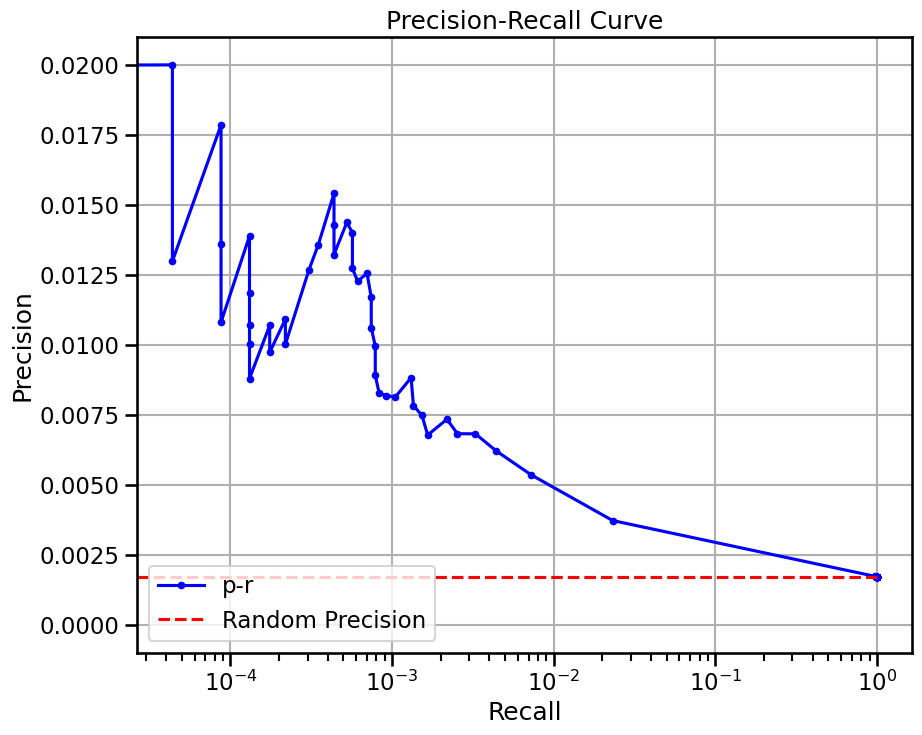

{'enriched_terms_Targets': ['0__TFs'], 'enriched_terms_Regulators': ['celltype.gmt__Hepatic stellate cells', 'celltype.gmt__Hepatocytes', 'celltype.gmt__Pancreatic stellate cells', 'celltype.gmt__Smooth muscle cells', 'celltype.gmt__Lymphatic Endothelial cells', 'celltype.gmt__Embryonic stem cells', 'celltype.gmt__Enterocytes', 'celltype.gmt__Neutrophils', 'celltype.gmt__Pulmonary alveolar type I cells', 'celltype.gmt__Non-classical monocytes', 'celltype.gmt__Ductal cells', 'celltype.gmt__Leydig cells', 'celltype.gmt__Perivascular cells', 'celltype.gmt__Fibroblasts', 'celltype.gmt__Classical Monocytes', 'celltype.gmt__Odontoblasts', 'celltype.gmt__Epiblast cells', 'celltype.gmt__Microglial cells', 'celltype.gmt__Stromal cells', 'celltype.gmt__HSC/MPP cells', 'celltype.gmt__Peri-islet Schwann cells', 'celltype.gmt__Myofibroblasts', 'celltype.gmt__Intermediate monocytes', 'celltype.gmt__Endothelial cells', 'celltype.gmt__Myocytes', 'celltype.gmt__Granulocytes', 'celltype.gmt__Cholangiocy

/tmp/ipykernel_297311/4148537333.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


podocyte
scprint



/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.col = Collator(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 536246649, sparsity: 1.0
base enrichment
too many genes for central computation
_________________________________________
TF specific enrichment


2024-05-03 12:01:41,418:INFO - Downloading and generating Enrichr library gene sets...
2024-05-03 12:01:41,420:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-05-03 12:01:41,617:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0


found some significant results for  4.464285714285714 % TFs

_________________________________________
loading GT,  omnipath


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:171: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros(adj.shape, dtype=np.float)


intersection of 12455 genes
intersection pct: 0.5380362002678302
precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398


 98%|█████████▊| 97/99 [00:24<00:00,  3.85it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:695: RuntimeWarning: invalid value encountered in long_scalars
  recall = (grn[true] > threshold).sum() / true.sum()
100%|██████████| 99/99 [00:25<00:00,  3.88it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0010131124115092798
EPR: 2.2118748085269497


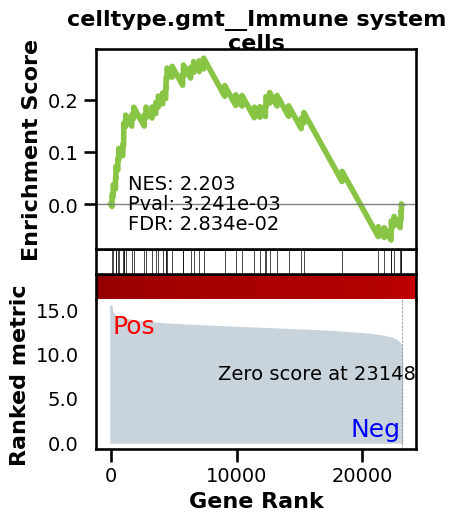

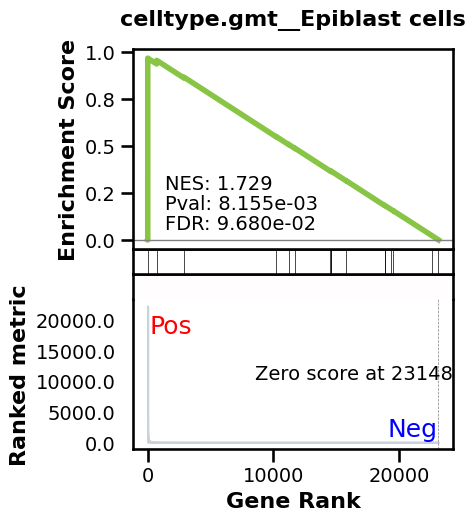

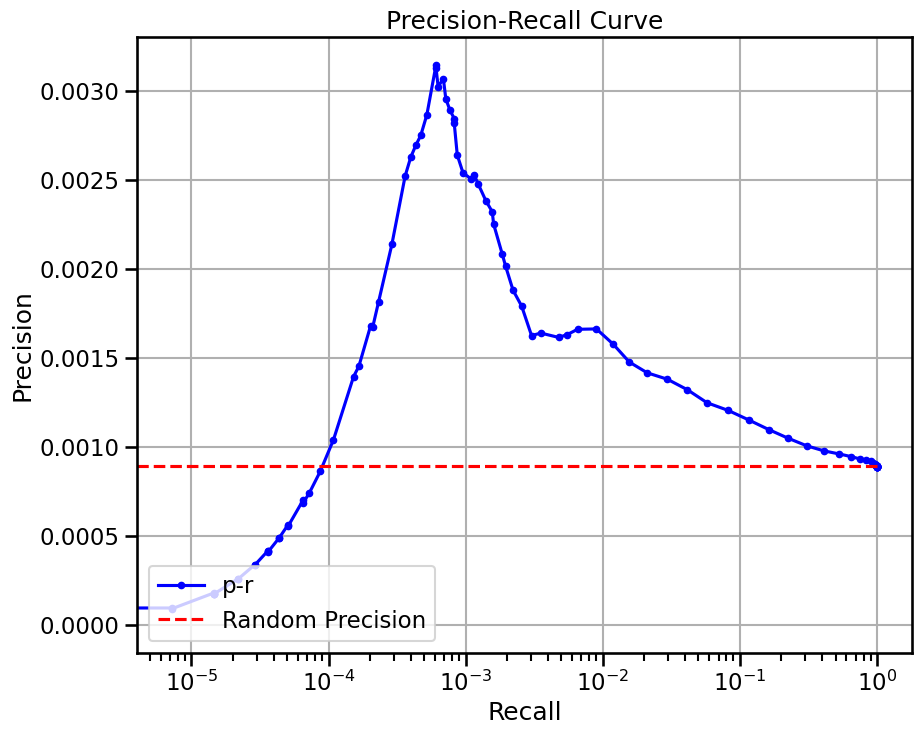

{'enriched_terms_Targets': ['celltype.gmt__Immune system cells'], 'enriched_terms_Regulators': ['celltype.gmt__Epiblast cells', 'celltype.gmt__Distal tubule cells'], 'significant_enriched_TFtargets': 4.464285714285714, 'precision': 0.0008896322223674437, 'recall': 1.0, 'rand_precision': 0.0008897036558203398, 'auprc': 0.0010131124115092798, 'EPR': 2.2118748085269497}
______________________________
now with classifier


/tmp/ipykernel_297311/4148537333.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


scprint



/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.col = Collator(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:326: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(genes), len(genes)), dtype=np.float)


true elem 23639 ...
doing regression....
metrics {'used_heads': 12, 'precision': 0.0, 'random_precision': 0.0014024767645218577, 'recall': 0.0, 'predicted_true': 269.0, 'number_of_true': 16632.0, 'epr': 2.1937115630865174}


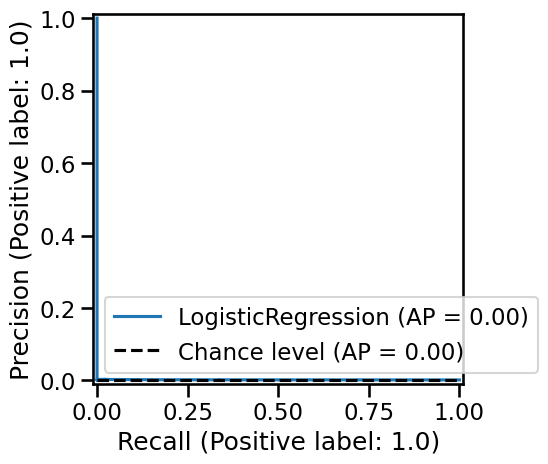

{'used_heads': 12, 'precision': 0.0, 'random_precision': 0.0014024767645218577, 'recall': 0.0, 'predicted_true': 269.0, 'number_of_true': 16632.0, 'epr': 2.1937115630865174}
base enrichment
Top central genes: []


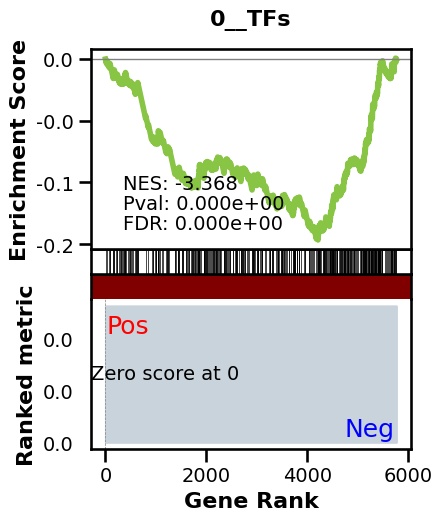

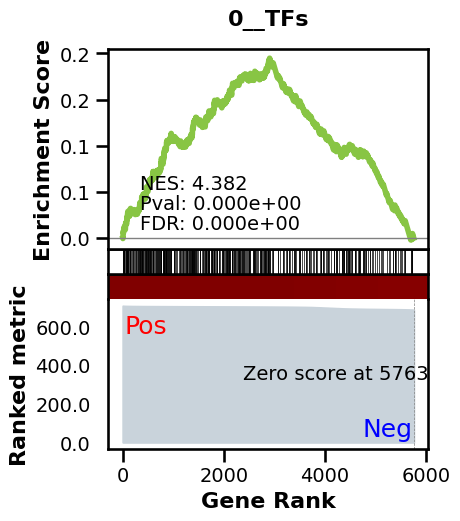

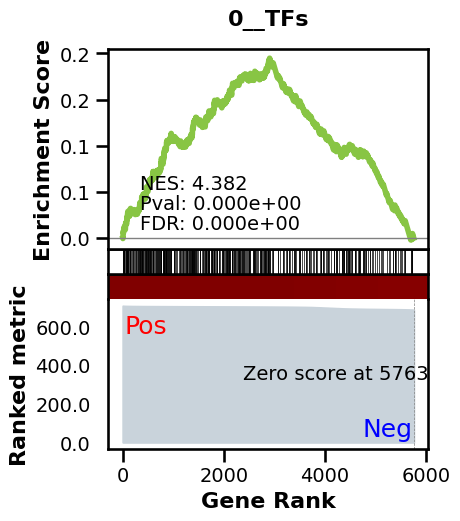

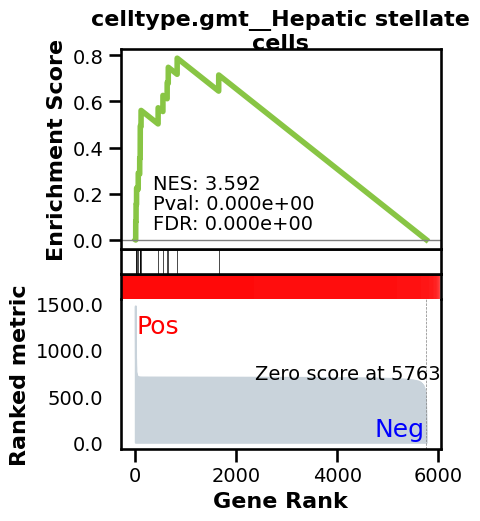

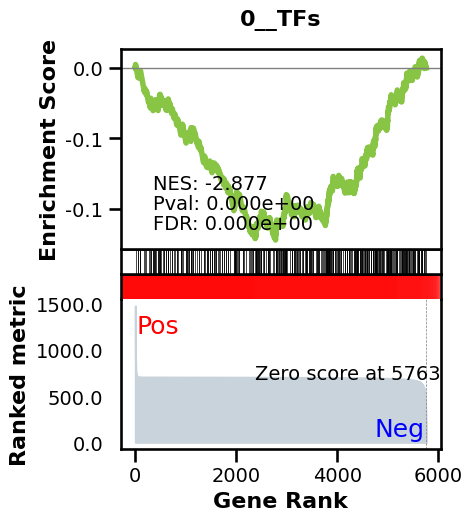

_________________________________________
TF specific enrichment


2024-05-03 12:08:33,536:INFO - Downloading and generating Enrichr library gene sets...
2024-05-03 12:08:33,540:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-05-03 12:08:33,734:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0


found some significant results for  7.547169811320755 % TFs

_________________________________________
loading GT,  omnipath


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:171: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros(adj.shape, dtype=np.float)


intersection of 4116 genes
intersection pct: 0.714087439278279
precision:  0.001395334615867727 
recall:  1.0 
random precision: 0.0013956737008290559


 97%|█████████▋| 96/99 [00:03<00:00, 32.00it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:695: RuntimeWarning: invalid value encountered in long_scalars
  recall = (grn[true] > threshold).sum() / true.sum()
100%|██████████| 99/99 [00:03<00:00, 31.49it/s]


Area Under Precision-Recall Curve (AUPRC):  0.002124261461866012
EPR: 2.1283780475939666


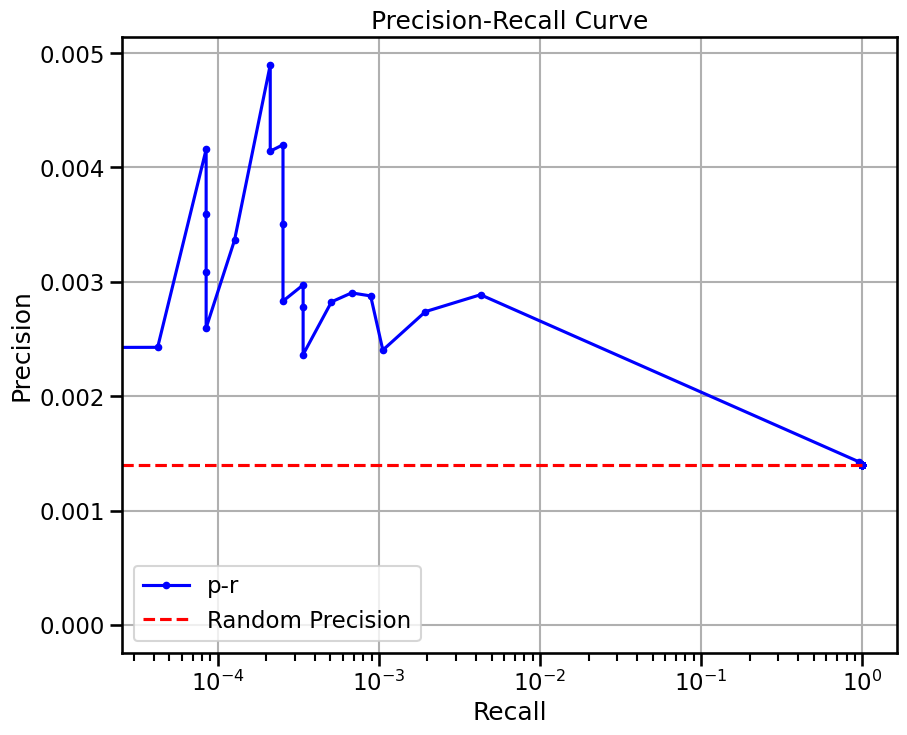

{'enriched_terms_Targets': ['0__TFs'], 'enriched_terms_Regulators': ['celltype.gmt__Hepatic stellate cells', 'celltype.gmt__Hepatocytes', 'celltype.gmt__Loop of Henle cells', 'celltype.gmt__Plasmacytoid Dendritic cells', 'celltype.gmt__Non-classical monocytes', 'celltype.gmt__Pulmonary alveolar type I cells', 'celltype.gmt__Myoblasts', 'celltype.gmt__Enterocytes', 'celltype.gmt__Retinal pigment epithelial cells', 'celltype.gmt__Endothelial', 'celltype.gmt__Lymphatic Endothelial cells', 'celltype.gmt__Stromal cells', 'celltype.gmt__Endothelial cells', 'celltype.gmt__Enteroendocrine cells', 'celltype.gmt__Pancreatic stellate cells', 'celltype.gmt__Mesenchymal stem cells', 'celltype.gmt__Intermediate monocytes', 'celltype.gmt__Pulmonary alveolar type II cells', 'celltype.gmt__Myeloid Dendritic cells', 'celltype.gmt__ISG expressing immune cells', 'celltype.gmt__Ductal cells', 'celltype.gmt__Embryonic stem cells', 'celltype.gmt__Immune system cells', 'celltype.gmt__Neutrophils', 'celltype.g

/tmp/ipykernel_297311/4148537333.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


macrophage
scprint



/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.col = Collator(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 533979664, sparsity: 1.0
base enrichment
too many genes for central computation
_________________________________________
TF specific enrichment


2024-05-03 12:10:43,381:INFO - Downloading and generating Enrichr library gene sets...
2024-05-03 12:10:43,383:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-05-03 12:10:43,606:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0


found some significant results for  3.5714285714285716 % TFs

_________________________________________
loading GT,  omnipath


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:171: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros(adj.shape, dtype=np.float)


intersection of 12433 genes
intersection pct: 0.5382251082251083
precision:  0.0008907779479074355 
recall:  1.0 
random precision: 0.0008908495999302723


 98%|█████████▊| 97/99 [00:25<00:00,  3.81it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:695: RuntimeWarning: invalid value encountered in long_scalars
  recall = (grn[true] > threshold).sum() / true.sum()
100%|██████████| 99/99 [00:26<00:00,  3.80it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0009869518210829018
EPR: 1.9516741688807393


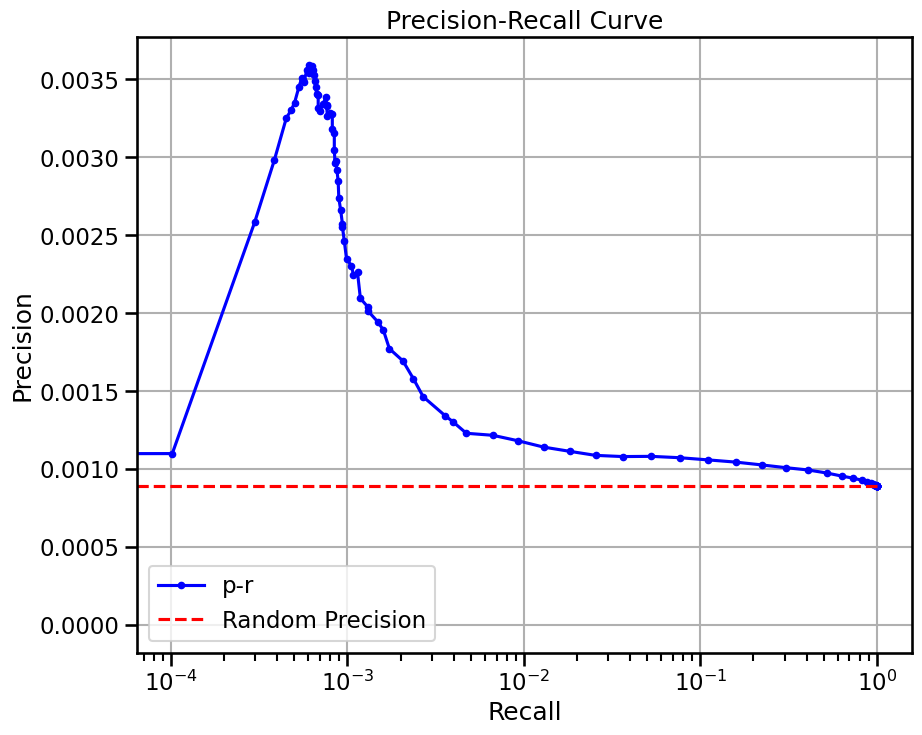

{'significant_enriched_TFtargets': 3.5714285714285716, 'precision': 0.0008907779479074355, 'recall': 1.0, 'rand_precision': 0.0008908495999302723, 'auprc': 0.0009869518210829018, 'EPR': 1.9516741688807393}
______________________________
now with classifier


/tmp/ipykernel_297311/4148537333.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


scprint



/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.col = Collator(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:326: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(genes), len(genes)), dtype=np.float)


true elem 18080 ...
doing regression....
metrics {'used_heads': 15, 'precision': 0.006153846153846154, 'random_precision': 0.0012258548302774921, 'recall': 0.0008247422680412372, 'predicted_true': 1625.0, 'number_of_true': 12125.0, 'epr': 3.656674221059488}


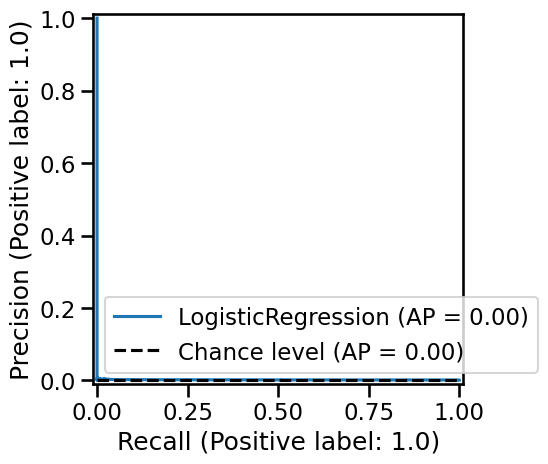

{'used_heads': 15, 'precision': 0.006153846153846154, 'random_precision': 0.0012258548302774921, 'recall': 0.0008247422680412372, 'predicted_true': 1625.0, 'number_of_true': 12125.0, 'epr': 3.656674221059488}
base enrichment
Top central genes: []


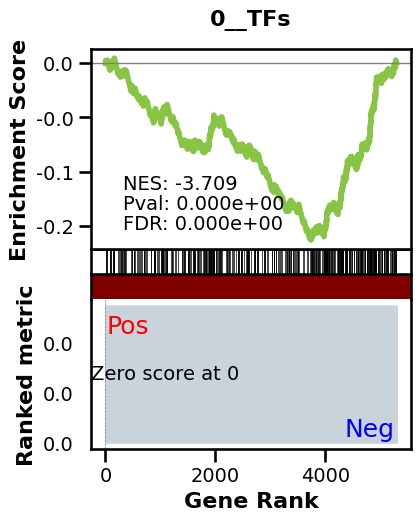

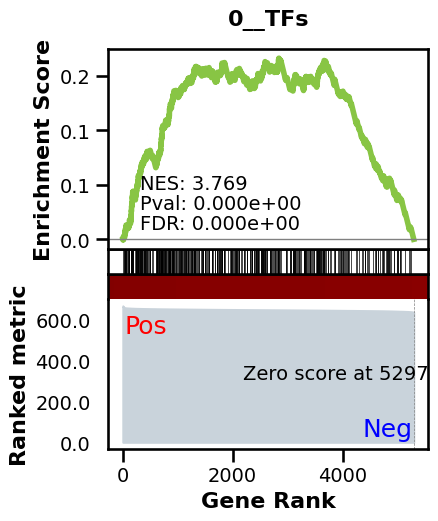

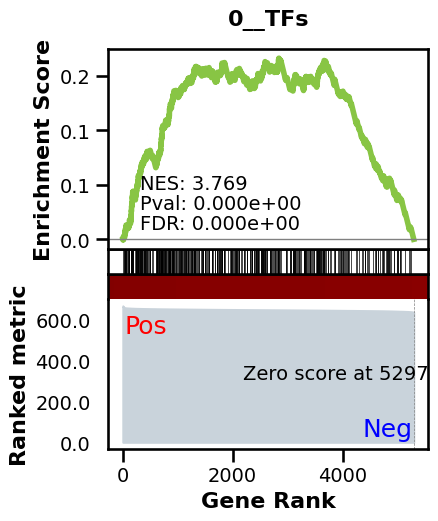

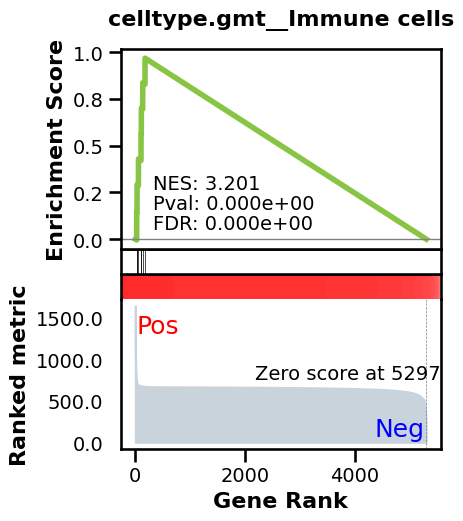

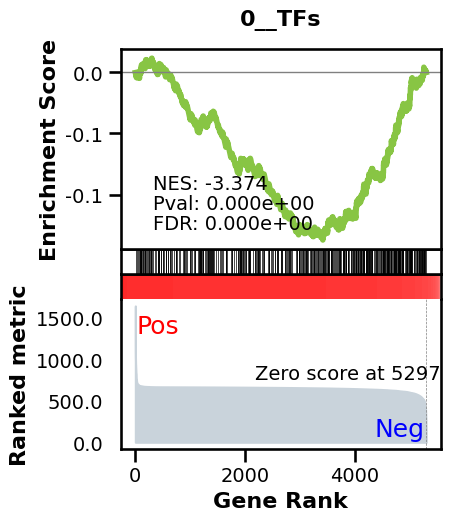

_________________________________________
TF specific enrichment


2024-05-03 12:16:52,358:INFO - Downloading and generating Enrichr library gene sets...
2024-05-03 12:16:52,361:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-05-03 12:16:52,554:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0


found some significant results for  22.727272727272727 % TFs

_________________________________________
loading GT,  omnipath


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:171: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros(adj.shape, dtype=np.float)


intersection of 3759 genes
intersection pct: 0.7095130237825594
precision:  0.0012795397280454372 
recall:  1.0 
random precision: 0.00127988021227323


 97%|█████████▋| 96/99 [00:02<00:00, 34.81it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:695: RuntimeWarning: invalid value encountered in long_scalars
  recall = (grn[true] > threshold).sum() / true.sum()
100%|██████████| 99/99 [00:02<00:00, 35.89it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0028961985413216286
EPR: 4.667259124806821


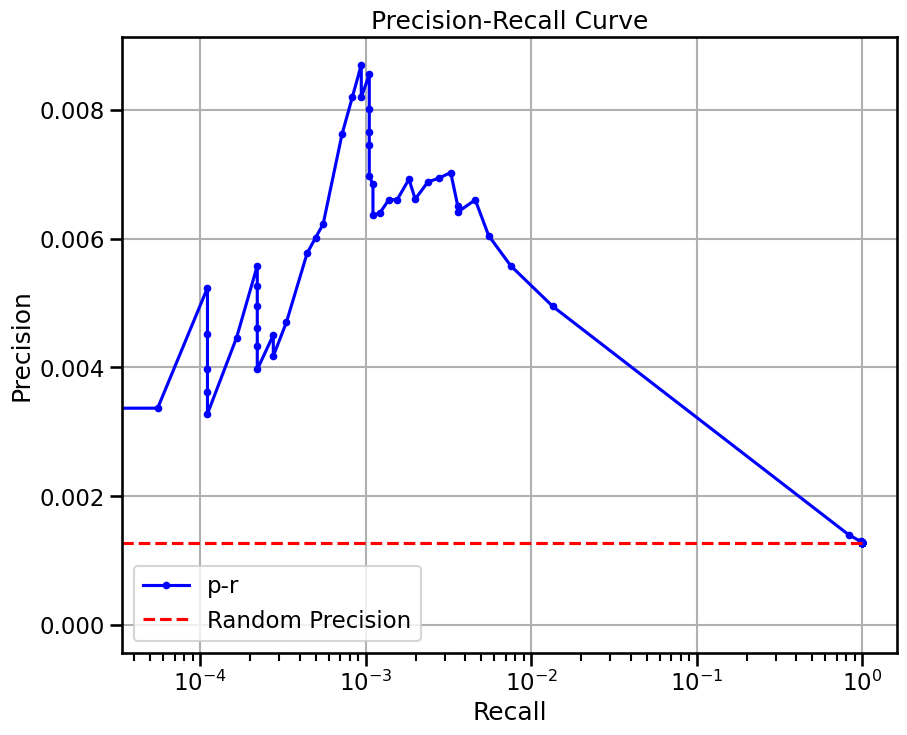

{'enriched_terms_Targets': ['0__TFs', 'celltype.gmt__Naive B cells', 'celltype.gmt__Memory B cells', 'celltype.gmt__Plasma B cells', 'celltype.gmt__Hematopoietic cells', 'celltype.gmt__Effector CD8+ T cells', 'celltype.gmt__Naive CD8+ T cells', 'celltype.gmt__Memory CD8+ T cells', 'celltype.gmt__Non-classical monocytes', 'celltype.gmt__Immune cells', 'celltype.gmt__-T cells', 'celltype.gmt__Granulocytes', 'celltype.gmt__Effector CD4+ T cells', 'celltype.gmt__Naive CD4+ T cells', 'celltype.gmt__Memory CD4+ T cells', 'celltype.gmt__Kupffer cells', 'celltype.gmt__Immune system cells', 'celltype.gmt__Langerhans cells', 'celltype.gmt__Podocytes'], 'enriched_terms_Regulators': ['celltype.gmt__Immune cells', 'celltype.gmt__Hepatic stellate cells', 'celltype.gmt__Smooth muscle cells', 'celltype.gmt__Myeloid Dendritic cells', 'celltype.gmt__Plasma B cells', 'celltype.gmt__Naive B cells', 'celltype.gmt__Memory B cells', 'celltype.gmt__Pro-B cells', 'celltype.gmt__Plasmacytoid Dendritic cells', '

/tmp/ipykernel_297311/4148537333.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


leukocyte
scprint



/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.col = Collator(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 536246649, sparsity: 1.0
base enrichment
too many genes for central computation
_________________________________________
TF specific enrichment


2024-05-03 12:19:02,943:INFO - Downloading and generating Enrichr library gene sets...
2024-05-03 12:19:02,946:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-05-03 12:19:03,149:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0


found some significant results for  3.5714285714285716 % TFs

_________________________________________
loading GT,  omnipath


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:171: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros(adj.shape, dtype=np.float)


intersection of 12455 genes
intersection pct: 0.5380362002678302
precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398


 98%|█████████▊| 97/99 [00:26<00:00,  3.65it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:695: RuntimeWarning: invalid value encountered in long_scalars
  recall = (grn[true] > threshold).sum() / true.sum()
100%|██████████| 99/99 [00:26<00:00,  3.67it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0009972878211185919
EPR: 2.498811651738885


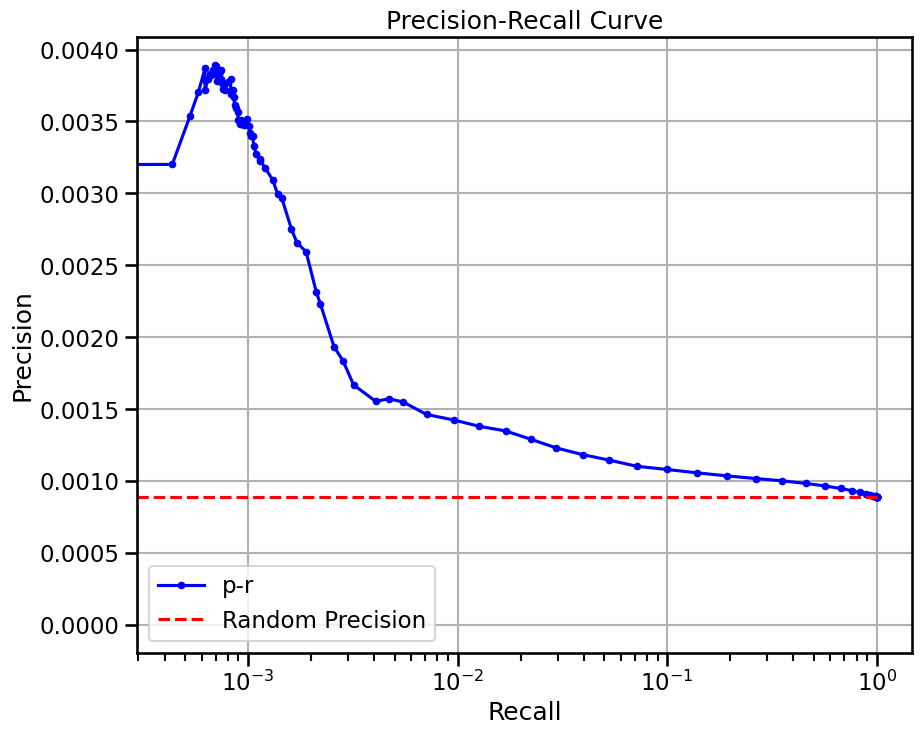

{'significant_enriched_TFtargets': 3.5714285714285716, 'precision': 0.0008896322223674437, 'recall': 1.0, 'rand_precision': 0.0008897036558203398, 'auprc': 0.0009972878211185919, 'EPR': 2.498811651738885}
______________________________
now with classifier


/tmp/ipykernel_297311/4148537333.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


scprint



/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.col = Collator(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:326: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(genes), len(genes)), dtype=np.float)


true elem 4614 ...
doing regression....
metrics {'used_heads': 13, 'precision': 0.007770270270270271, 'random_precision': 0.0009903002260915421, 'recall': 0.010172490048651039, 'predicted_true': 2960.0, 'number_of_true': 2261.0, 'epr': 7.233741896121547}


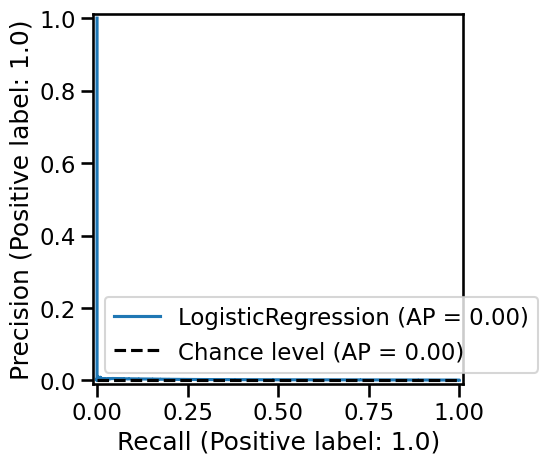

{'used_heads': 13, 'precision': 0.007770270270270271, 'random_precision': 0.0009903002260915421, 'recall': 0.010172490048651039, 'predicted_true': 2960.0, 'number_of_true': 2261.0, 'epr': 7.233741896121547}
base enrichment
Top central genes: []


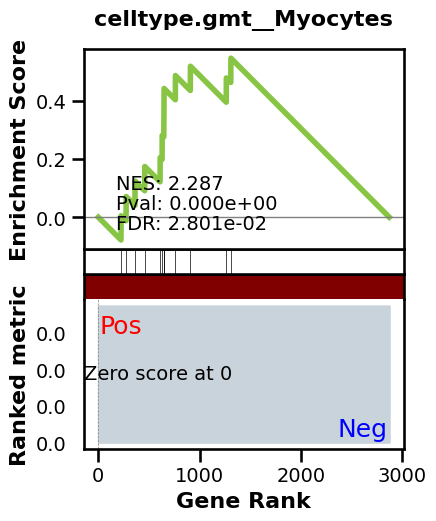

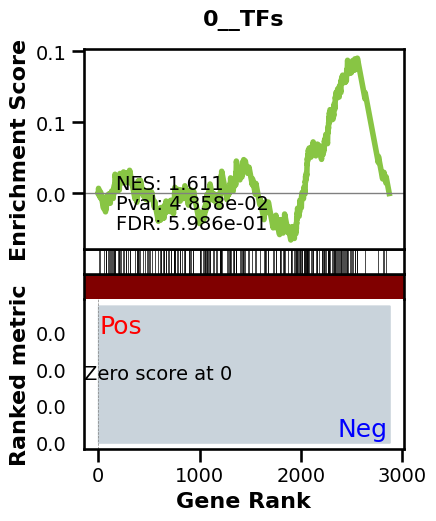

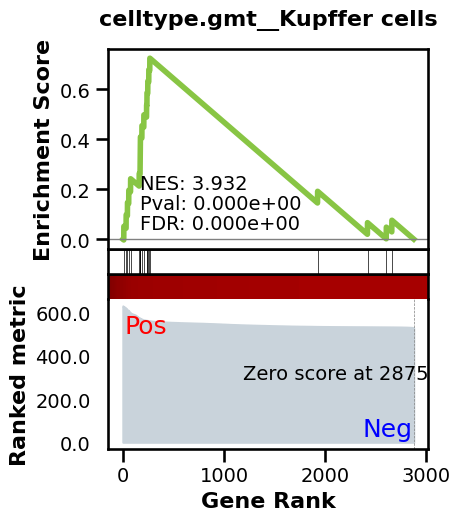

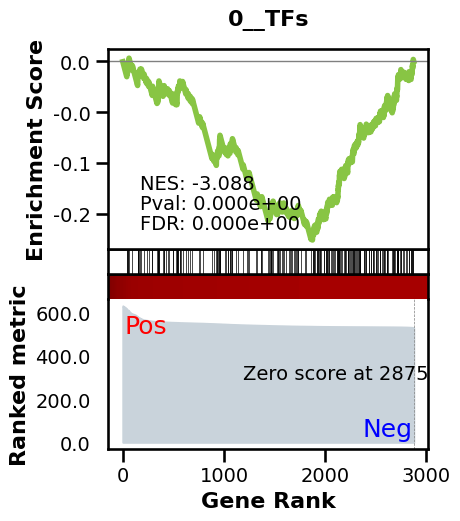

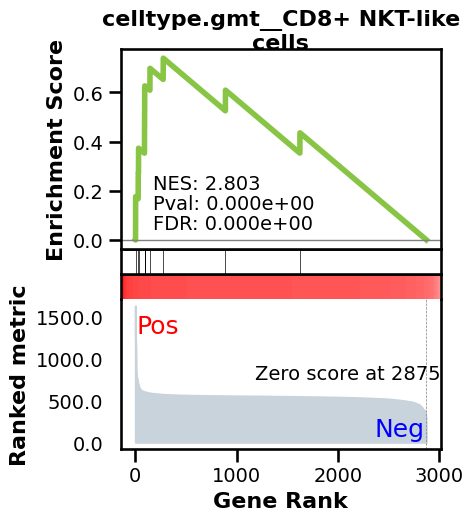

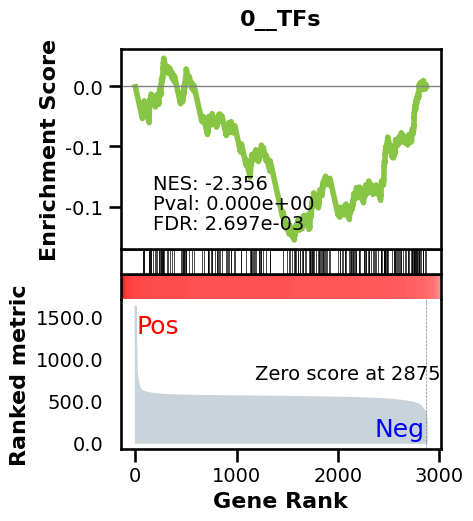

_________________________________________
TF specific enrichment


2024-05-03 12:23:44,345:INFO - Downloading and generating Enrichr library gene sets...
2024-05-03 12:23:44,346:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-05-03 12:23:44,538:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0


found some significant results for  21.05263157894737 % TFs

_________________________________________
loading GT,  omnipath


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:171: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros(adj.shape, dtype=np.float)


intersection of 1806 genes
intersection pct: 0.6279554937413073
precision:  0.0014146275059510013 
recall:  1.0 
random precision: 0.0014154112331011127


 91%|█████████ | 90/99 [00:00<00:00, 183.36it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:695: RuntimeWarning: invalid value encountered in long_scalars
  recall = (grn[true] > threshold).sum() / true.sum()
100%|██████████| 99/99 [00:00<00:00, 176.96it/s]


Area Under Precision-Recall Curve (AUPRC):  0.003888347247321166
EPR: 7.324971045172312


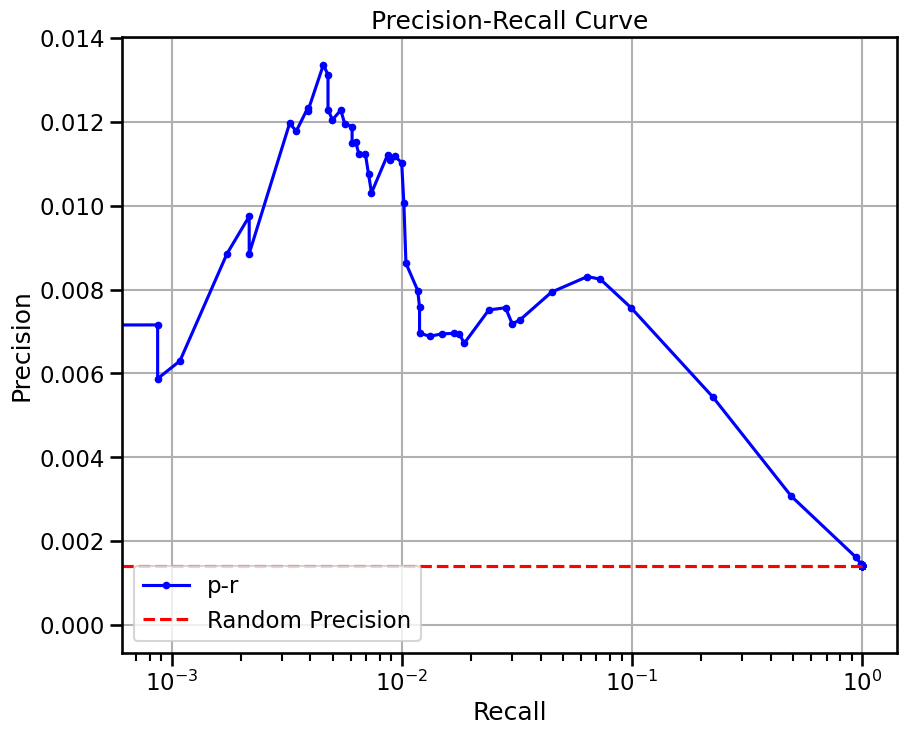

{'enriched_terms_Central': ['celltype.gmt__Myocytes', 'celltype.gmt__Enterocytes'], 'enriched_terms_Targets': ['celltype.gmt__Kupffer cells', 'celltype.gmt__Non-classical monocytes', 'celltype.gmt__Immune system cells', 'celltype.gmt__Naive CD8+ T cells', 'celltype.gmt__Memory CD8+ T cells', 'celltype.gmt__Effector CD8+ T cells', 'celltype.gmt__Immune cells', 'celltype.gmt__-T cells', 'celltype.gmt__CD8+ NKT-like cells', 'celltype.gmt__Intermediate monocytes', 'celltype.gmt__Classical Monocytes', 'celltype.gmt__Effector CD4+ T cells', 'celltype.gmt__Naive CD4+ T cells', 'celltype.gmt__Memory CD4+ T cells', 'celltype.gmt__Natural killer cells', 'celltype.gmt__CD4+ NKT-like cells', 'celltype.gmt__Memory B cells', 'celltype.gmt__Plasma B cells', 'celltype.gmt__Naive B cells', 'celltype.gmt__Pro-B cells', 'celltype.gmt__Myeloid Dendritic cells', 'celltype.gmt__Keratinocytes', 'celltype.gmt__Pre-B cells', 'celltype.gmt__Smooth muscle cells', 'celltype.gmt__Macrophages', 'celltype.gmt__Hemat

/tmp/ipykernel_297311/4148537333.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


kidney interstitial fibroblast
scprint



/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.col = Collator(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 536246649, sparsity: 1.0
base enrichment
too many genes for central computation
_________________________________________
TF specific enrichment


2024-05-03 12:25:18,855:INFO - Downloading and generating Enrichr library gene sets...
2024-05-03 12:25:18,857:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-05-03 12:25:19,053:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0


found some significant results for  4.464285714285714 % TFs

_________________________________________
loading GT,  omnipath


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:171: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros(adj.shape, dtype=np.float)


intersection of 12455 genes
intersection pct: 0.5380362002678302
precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398


 98%|█████████▊| 97/99 [00:24<00:00,  3.83it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:695: RuntimeWarning: invalid value encountered in long_scalars
  recall = (grn[true] > threshold).sum() / true.sum()
100%|██████████| 99/99 [00:24<00:00,  4.01it/s]


Area Under Precision-Recall Curve (AUPRC):  0.001039724020914828
EPR: 2.548030103079128


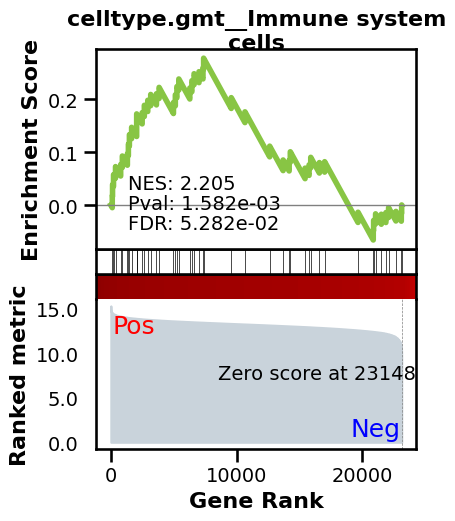

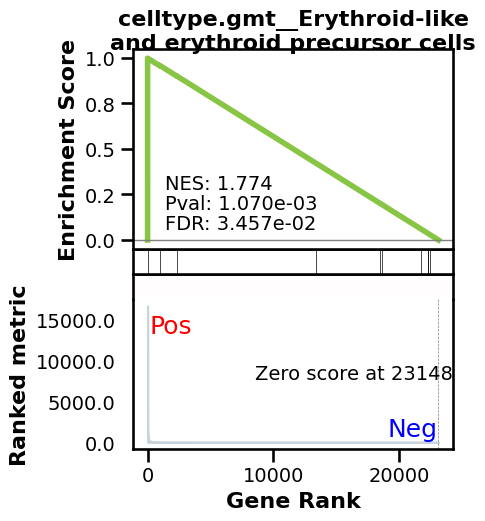

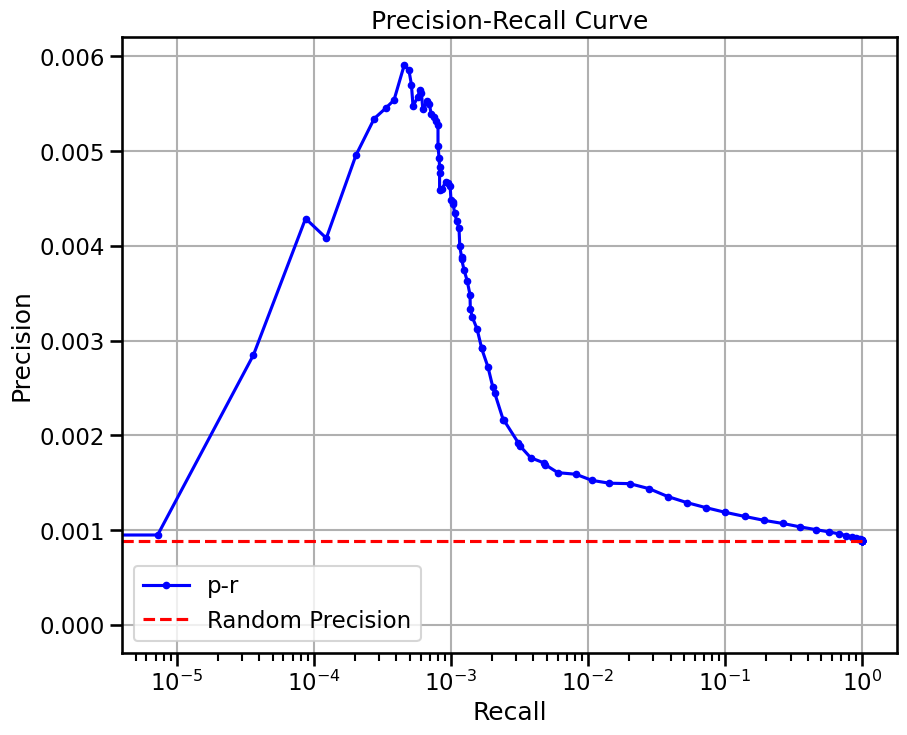

{'enriched_terms_Targets': ['celltype.gmt__Immune system cells'], 'enriched_terms_Regulators': ['celltype.gmt__Erythroid-like and erythroid precursor cells'], 'significant_enriched_TFtargets': 4.464285714285714, 'precision': 0.0008896322223674437, 'recall': 1.0, 'rand_precision': 0.0008897036558203398, 'auprc': 0.001039724020914828, 'EPR': 2.548030103079128}
______________________________
now with classifier


/tmp/ipykernel_297311/4148537333.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


scprint



/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.col = Collator(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

/home/ml4ig1/Documents code/benGRN/bengrn/base.py:326: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros((len(genes), len(genes)), dtype=np.float)


true elem 17566 ...
doing regression....
metrics {'used_heads': 13, 'precision': 0.00940623162845385, 'random_precision': 0.0013141903977737098, 'recall': 0.001480932987782303, 'predicted_true': 1701.0, 'number_of_true': 10804.0, 'epr': 4.621387725335876}


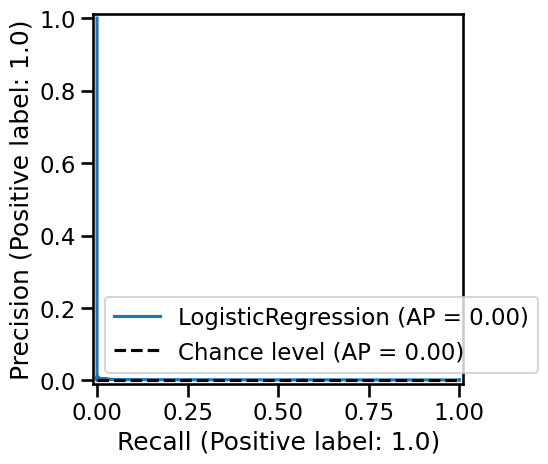

{'used_heads': 13, 'precision': 0.00940623162845385, 'random_precision': 0.0013141903977737098, 'recall': 0.001480932987782303, 'predicted_true': 1701.0, 'number_of_true': 10804.0, 'epr': 4.621387725335876}
base enrichment
Top central genes: []


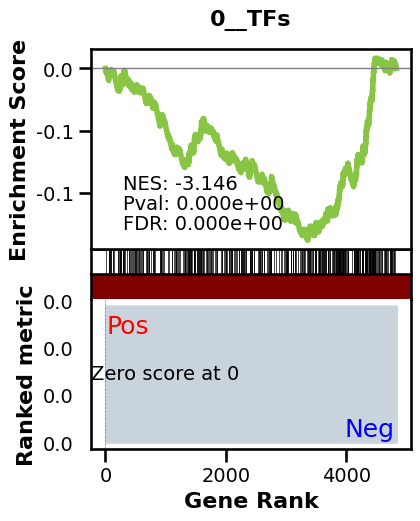

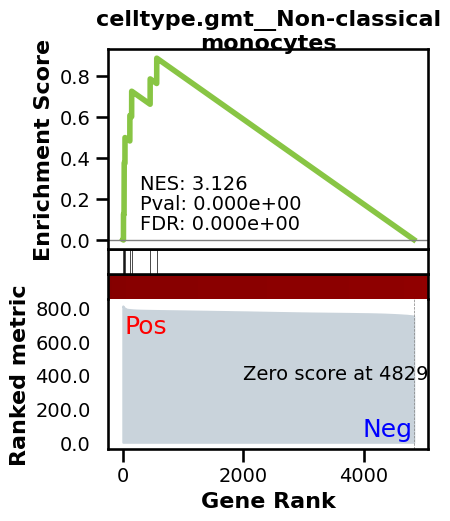

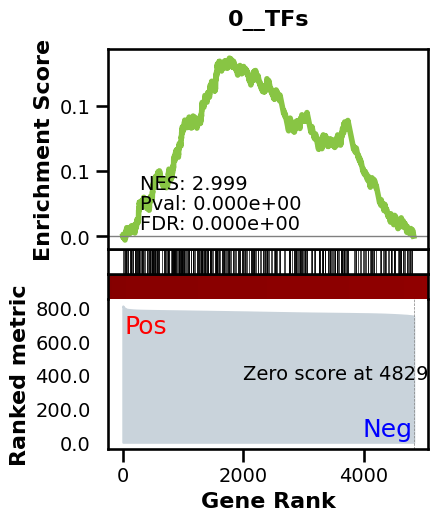

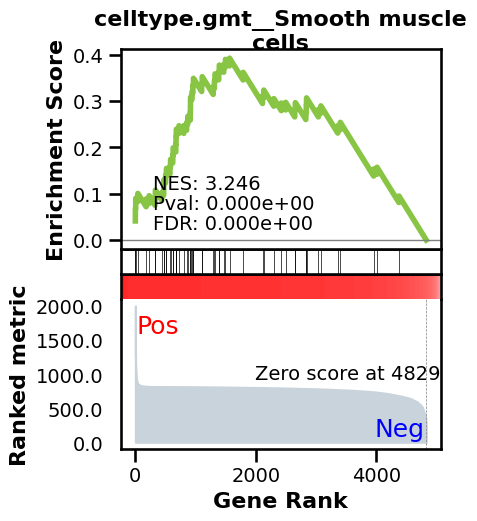

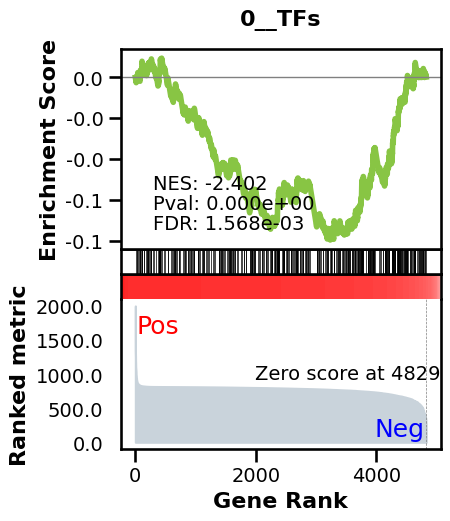

_________________________________________
TF specific enrichment


2024-05-03 12:31:01,217:INFO - Downloading and generating Enrichr library gene sets...
2024-05-03 12:31:01,220:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-05-03 12:31:01,405:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0


found some significant results for  28.0 % TFs

_________________________________________
loading GT,  omnipath


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:171: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros(adj.shape, dtype=np.float)


intersection of 3427 genes
intersection pct: 0.7095238095238096
precision:  0.0014957006057987646 
recall:  1.0 
random precision: 0.0014961371792388694


 96%|█████████▌| 95/99 [00:02<00:00, 47.12it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:695: RuntimeWarning: invalid value encountered in long_scalars
  recall = (grn[true] > threshold).sum() / true.sum()
100%|██████████| 99/99 [00:02<00:00, 46.50it/s]


Area Under Precision-Recall Curve (AUPRC):  0.003052153020458784
EPR: 4.381458059298787


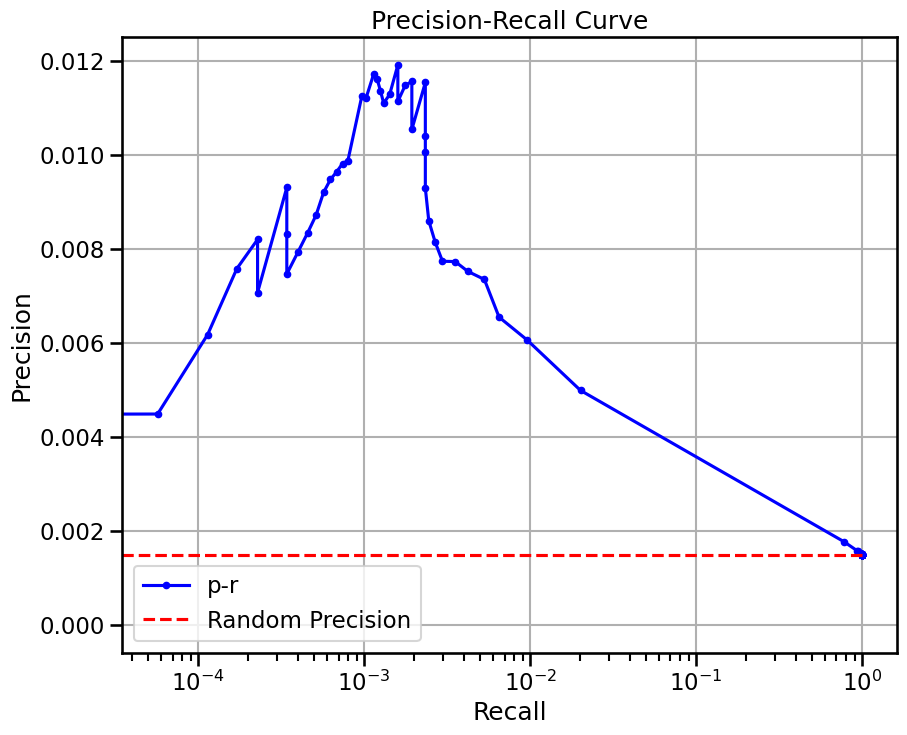

{'enriched_terms_Targets': ['celltype.gmt__Non-classical monocytes', '0__TFs', 'celltype.gmt__Intermediate monocytes', 'celltype.gmt__Memory CD8+ T cells', 'celltype.gmt__Effector CD8+ T cells', 'celltype.gmt__Naive CD8+ T cells', 'celltype.gmt__Hematopoietic cells', 'celltype.gmt__Classical Monocytes', 'celltype.gmt__Granulocytes', 'celltype.gmt__Neutrophils', 'celltype.gmt__Memory CD4+ T cells'], 'enriched_terms_Regulators': ['celltype.gmt__Smooth muscle cells', 'celltype.gmt__Hepatic stellate cells', 'celltype.gmt__Hepatocytes', 'celltype.gmt__Pancreatic stellate cells', 'celltype.gmt__Immune cells', 'celltype.gmt__Mesangial cells', 'celltype.gmt__Non-classical monocytes', 'celltype.gmt__Cholangiocytes', 'celltype.gmt__Ductal cells', 'celltype.gmt__Pulmonary alveolar type II cells', 'celltype.gmt__Endothelial', 'celltype.gmt__Loop of Henle cells', 'celltype.gmt__Classical Monocytes', 'celltype.gmt__Microfold cells', 'celltype.gmt__Immune system cells', 'celltype.gmt__Naive CD8+ T ce

/tmp/ipykernel_297311/4148537333.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


endothelial cell
scprint



/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.col = Collator(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

avg link count: 536246649, sparsity: 1.0
base enrichment
too many genes for central computation
_________________________________________
TF specific enrichment


2024-05-03 12:32:59,325:INFO - Downloading and generating Enrichr library gene sets...
2024-05-03 12:32:59,328:INFO - Library is already downloaded in: /home/ml4ig1/.cache/gseapy/Enrichr.ENCODE_TF_ChIP-seq_2014.gmt, use local file
2024-05-03 12:32:59,535:INFO - 0332 gene_sets have been filtered out when max_size=2000 and min_size=0


found some significant results for  5.357142857142857 % TFs

_________________________________________
loading GT,  omnipath


/home/ml4ig1/Documents code/benGRN/bengrn/base.py:171: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  da = np.zeros(adj.shape, dtype=np.float)


intersection of 12455 genes
intersection pct: 0.5380362002678302
precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398


 98%|█████████▊| 97/99 [00:25<00:00,  3.80it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:695: RuntimeWarning: invalid value encountered in long_scalars
  recall = (grn[true] > threshold).sum() / true.sum()
100%|██████████| 99/99 [00:25<00:00,  3.83it/s]


Area Under Precision-Recall Curve (AUPRC):  0.0009690509128322515
EPR: 2.1709076224338677


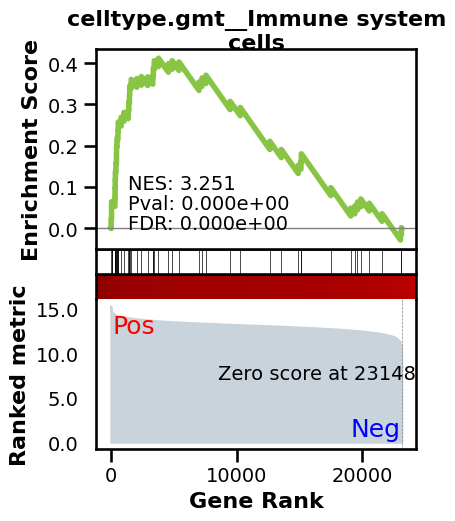

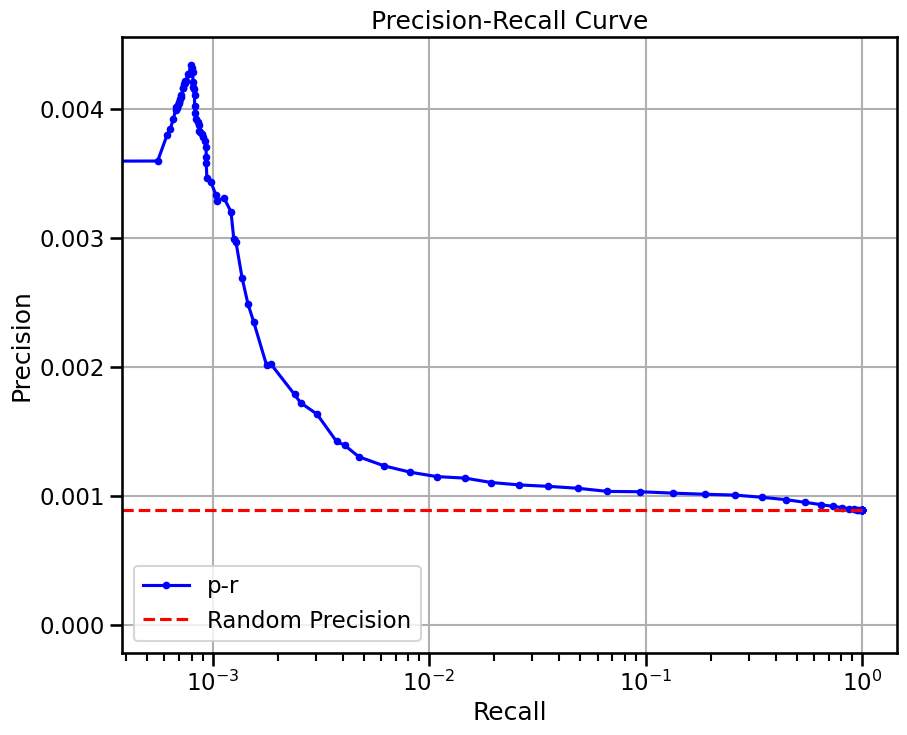

{'enriched_terms_Targets': ['celltype.gmt__Immune system cells', 'celltype.gmt__Microglial cells', 'celltype.gmt__Kupffer cells', 'celltype.gmt__Neutrophils', 'celltype.gmt__Eosinophils'], 'significant_enriched_TFtargets': 5.357142857142857, 'precision': 0.0008896322223674437, 'recall': 1.0, 'rand_precision': 0.0008897036558203398, 'auprc': 0.0009690509128322515, 'EPR': 2.1709076224338677}
______________________________
now with classifier


/tmp/ipykernel_297311/4148537333.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=adata.obs['organism_ontology_term_id'][0],
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


scprint



/home/ml4ig1/Documents code/scPRINT/scprint/tasks/grn.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.col = Collator(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

RuntimeError: cannot reshape tensor of 0 elements into shape [-1, 0, 64] because the unspecified dimension size -1 can be any value and is ambiguous

In [11]:
metrics = {}
for celltype in elem:
    grn_inferer = GRNfer(model, adata,
        how="random expr",
        preprocess="softmax",
        head_agg='max',
        filtration="none",
        forward_mode="none",
        organisms=adata.obs['organism_ontology_term_id'][0],
        apc=False,
        symmetrize=False,
        num_genes=3000,
        max_cells=1024,
        doplot=False,
        batch_size=32,
    )
    print(celltype)
    print("scprint\n")
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    m = BenGRN(grn).scprint_benchmark()
    metrics[celltype+'_scprint'] = m
    print(m)
    print("______________________________")
    print("now with classifier")
    grn_inferer = GRNfer(model, adata,
        how="most var across",
        preprocess="softmax",
        head_agg='none',
        filtration="none",
        forward_mode="none",
        organisms=adata.obs['organism_ontology_term_id'][0],
        apc=False,
        symmetrize=False,
        num_genes=6000,
        max_cells=1024,
        doplot=False,
        batch_size=32,
    )
    print("scprint\n")
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn, m = train_classifier(grn, C=0.1, train_size=0.3, class_weight={1: 100, 0: 1}, shuffle=False)
    grn.varp['GRN'] = grn.varp['classified']
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    print(m)
    m = BenGRN(grn).scprint_benchmark()
    print(m)
    metrics[celltype+'_scprint_class'] = m
    print("__________________________________")